## <font color='0C2054'> **LIBRERÍAS** </font>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score
!pip install kneed
from kneed import KneeLocator

from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA, FactorAnalysis

!pip install factor_analyzer
from factor_analyzer import FactorAnalyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42564 sha256=2ada39d0cb9ca71d5bff0586825a2f8671fb37dc70d2c8359f16e01d449cacbb
  Stored in directory: /root/.cache/pip/wheels/24/59/82/6493618e30ed1cb7a013b9e1b0c9e17de80b04dfcef4ba8a4d
Successfully built factor_analyzer


## <font color='0c2054'> **IMPORTACIÓN DE DATOS** </font>

El conjunto de datos cuenta con información sobre el comportamiento de uso de alrededor de 9000 usuarios de tarjetas de crédito durante los últimos seis meses.

In [ ]:
# Lectura de los datos
df = pd.read_csv("https://raw.githubusercontent.com/RAHULKASHYAP02/Credit-Card-Segmentation/master/CC%20GENERAL.csv")

# Mostrar el DataFrame
df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [ ]:
# Eliminación de variables no significativas
df.drop(['CUST_ID'], axis=1, inplace=True)

# Tamaño del dataset
df.shape

(8950, 17)

In [ ]:
# Organizar el DataSet
df = df.sort_index(axis=1)

In [ ]:
# Información general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   CASH_ADVANCE                      8950 non-null   float64
 3   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 4   CASH_ADVANCE_TRX                  8950 non-null   int64  
 5   CREDIT_LIMIT                      8949 non-null   float64
 6   INSTALLMENTS_PURCHASES            8950 non-null   float64
 7   MINIMUM_PAYMENTS                  8637 non-null   float64
 8   ONEOFF_PURCHASES                  8950 non-null   float64
 9   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 10  PAYMENTS                          8950 non-null   float64
 11  PRC_FULL_PAYMENT                  8950 non-null   float64
 12  PURCHA

## <font color='0C2054'> **SELECCIÓN DE CARACTERÍSTICAS** </font>

Las variables TRX y MINIMUM_PAYMENTS contienen información que ya está representada de alguna manera en otras variables del conjunto de datos.

In [ ]:
# Eliminación de variables no significativas
df.drop(['CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'MINIMUM_PAYMENTS'], axis=1, inplace=True)

## <font color='0C2054'> **EDA** </font>

### <font color='0C2054'> **Diagrama de Densidad** </font>

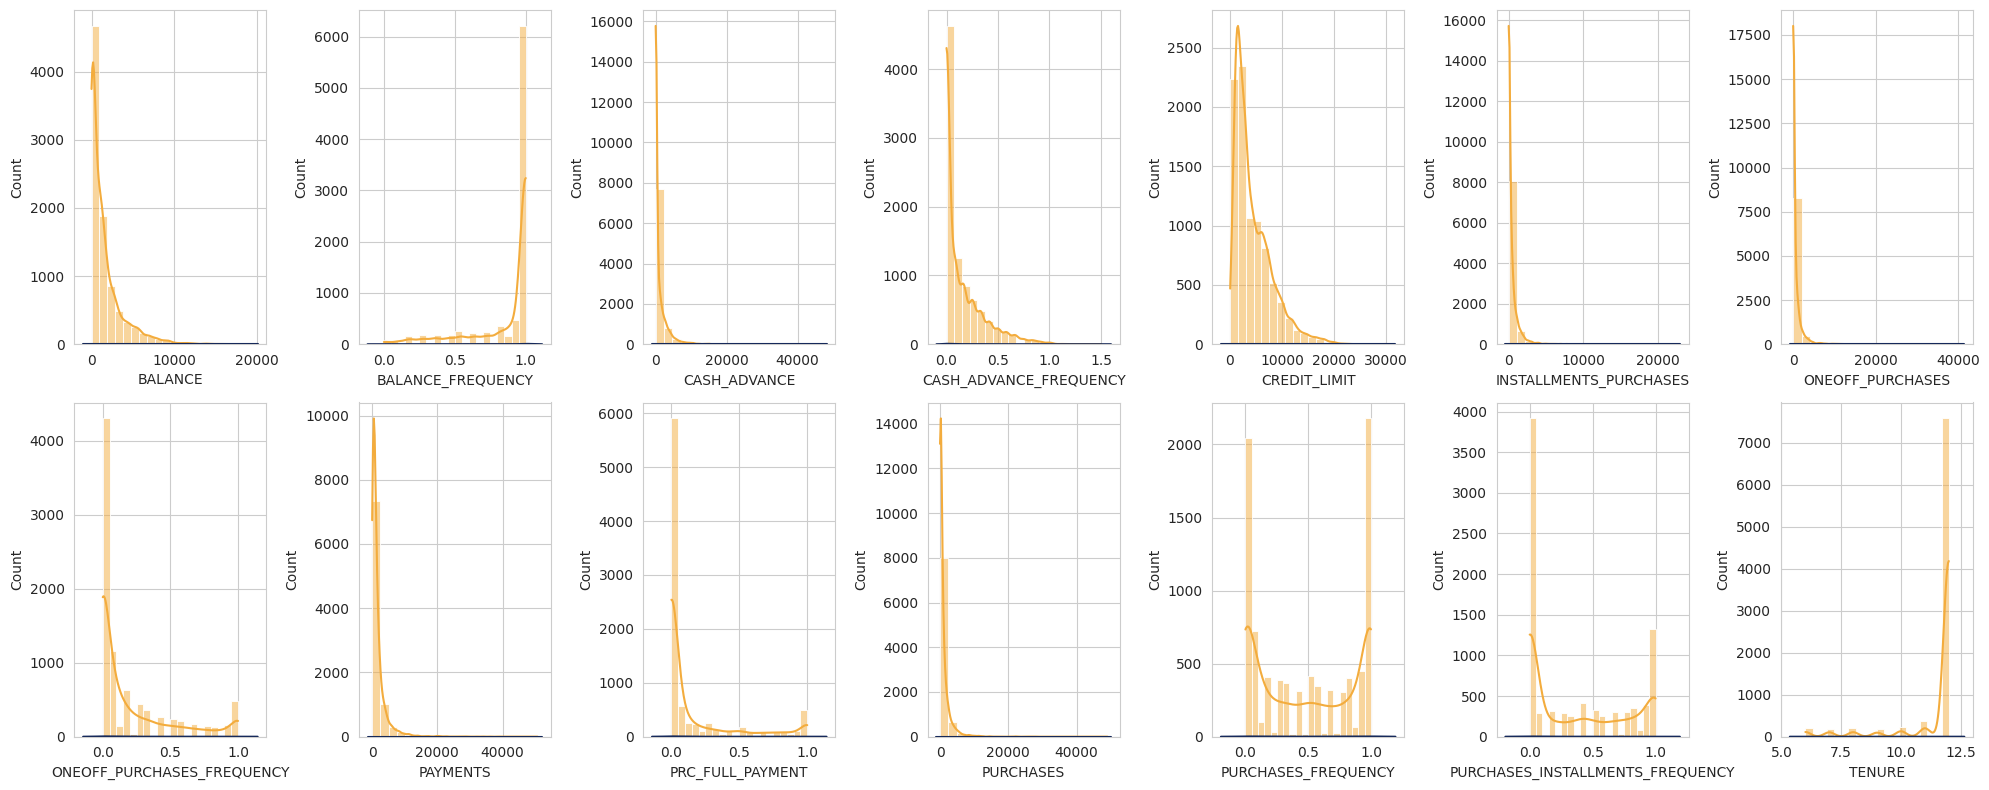

In [ ]:
# Definir la lista de columnas numéricas
numeric_columns = df.columns

# Configurar el estilo de Seaborn
sns.set_style("whitegrid")

# Crear subplots para cada variable numérica
fig = plt.figure(figsize=(20, 8))

for i, col in enumerate(numeric_columns):
    ax = plt.subplot(2, 7, i + 1)
    sns.histplot(df[col], bins=20, kde=True, color="#F3AC3D")
    sns.kdeplot(df[col], color="#0C2054", ax=ax)

#Paleta de colores '#CCCCCC', '#191919', '#0C2054', '#F3AC3D'

# Ajustar automáticamente el espaciado de los subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()

### <font color='0C2054'> **Diagrama de Cajas y Bigotes** </font>

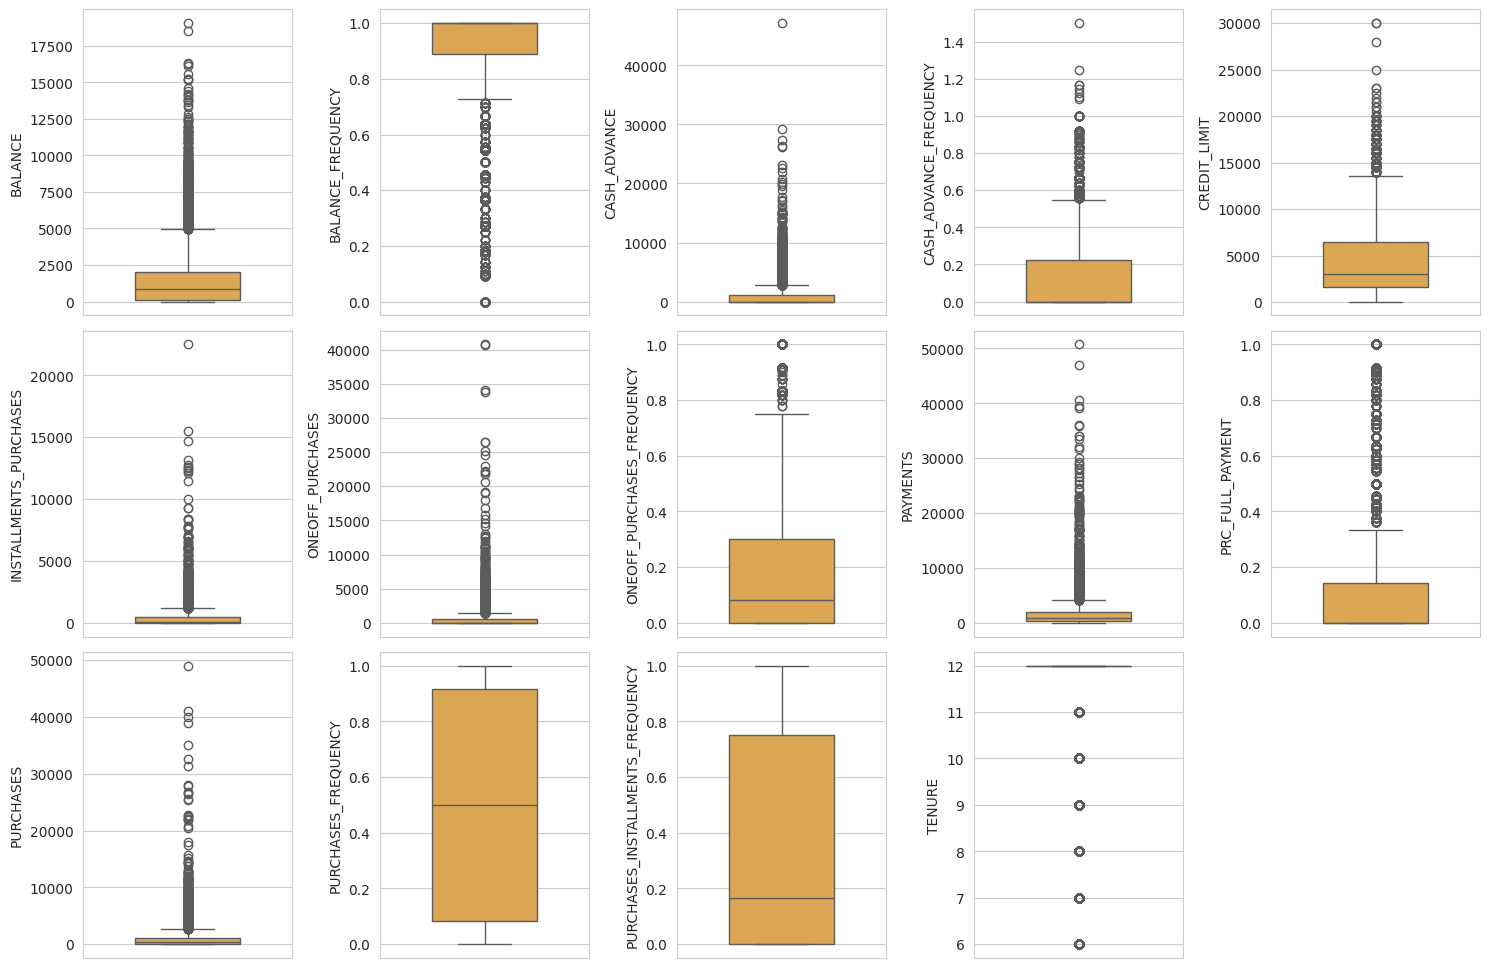

In [ ]:
# Definir el tamaño de la figura
plt.figure(figsize=(15, 13))

# Iterar sobre las variables numéricas y crear boxplots
for i in range(len(numeric_columns)):
    plt.subplot(4, 5, i + 1)
    sns.boxplot(y=df[numeric_columns[i]], orient='v', width=0.5, color='#F3AC3D')
    plt.tight_layout()

plt.show()

De acuerdo con ambos diagramas, es evidente la presencia de datos atípicos, y que las distribuciones tienen mucho sesgo, representado hacia la derecha.

### <font color='0C2054'> **Matriz de Correlación** </font>

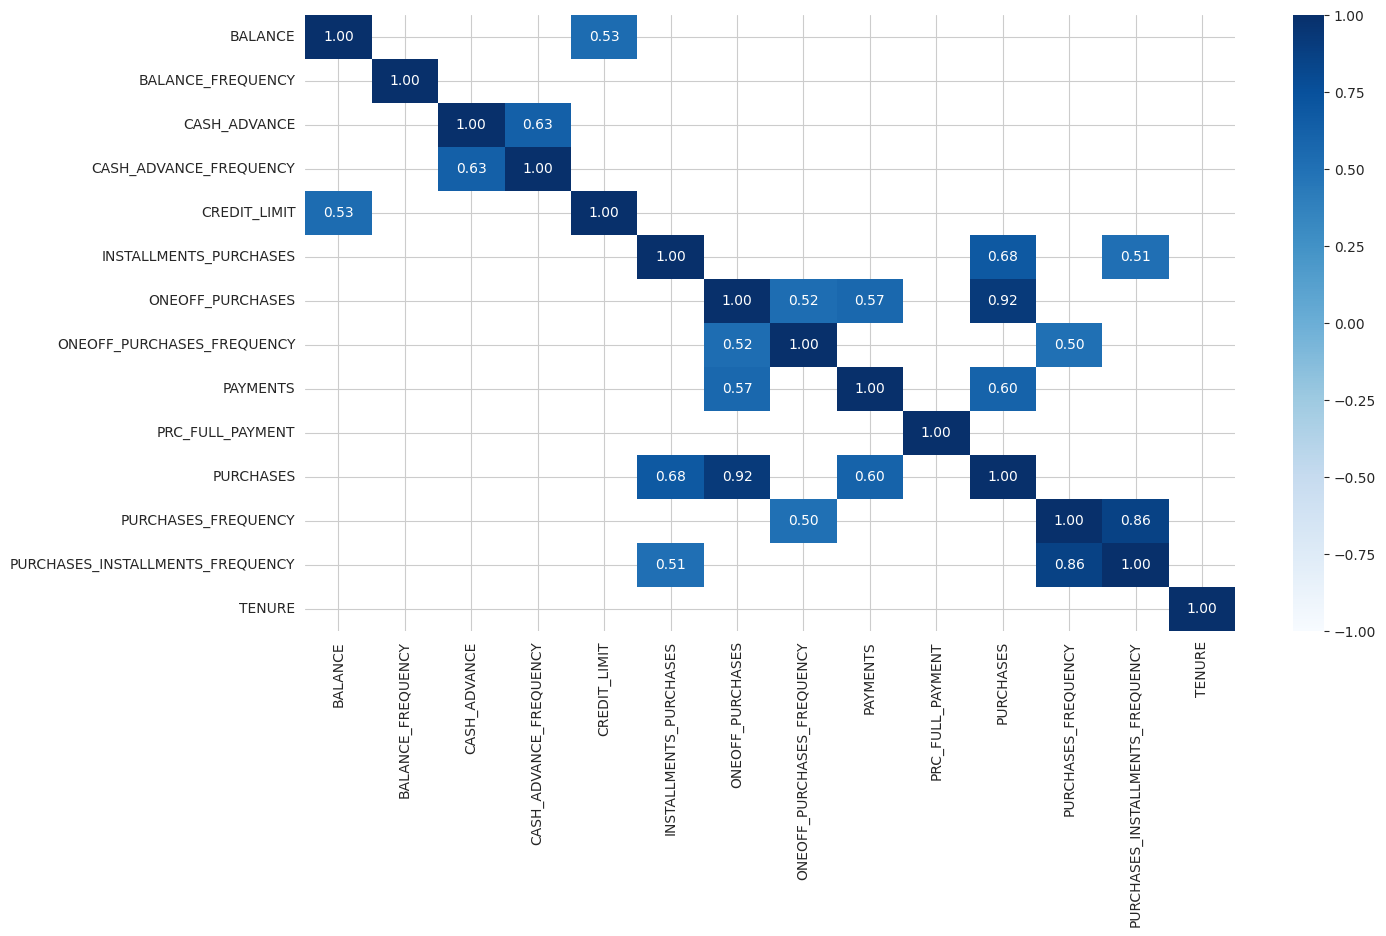

In [ ]:
# Obtener la matriz de correlación (suponiendo que 'data' es tu DataFrame)
c = df.corr()

# Filtrar la matriz de correlación para mostrar solo las correlaciones superiores a 0.6
corr_matrix_filtered = c[(c > 0.5)|(c < -0.5)]

# Configurar el tamaño de la figura
plt.figure(figsize=(15, 8))

# Crear el mapa de calor de la matriz de correlación filtrada
sns.heatmap(corr_matrix_filtered, annot=True, fmt=".2f", vmin=-1, vmax=1, cmap="Blues")

# Mostrar el mapa de calor
plt.show()

La matriz de correlación muestra la alta dependencia que tienen las variables PURCHASES y ONEOFF_PURCHASES, con un valor por encima del 0.92

In [ ]:
# Eliminación de columna altamente correlacionada
df.drop(['PURCHASES'], axis=1, inplace=True)

In [ ]:
df.describe()

BALANCE  BALANCE_FREQUENCY  CASH_ADVANCE  CASH_ADVANCE_FREQUENCY  \
count   8950.000000        8950.000000   8950.000000             8950.000000   
mean    1564.474828           0.877271    978.871112                0.135144   
std     2081.531879           0.236904   2097.163877                0.200121   
min        0.000000           0.000000      0.000000                0.000000   
25%      128.281915           0.888889      0.000000                0.000000   
50%      873.385231           1.000000      0.000000                0.000000   
75%     2054.140036           1.000000   1113.821139                0.222222   
max    19043.138560           1.000000  47137.211760                1.500000   

       CREDIT_LIMIT  INSTALLMENTS_PURCHASES  ONEOFF_PURCHASES  \
count   8949.000000             8950.000000       8950.000000   
mean    4494.449450              411.067645        592.437371   
std     3638.815725              904.338115       1659.887917   
min       50.000000                0.000000          0.000000   
25%     1600.000000                0.000000          0.000000   
50%     3000.000000               89.000000         38.000000   
75%     6500.000000              468.637500        577.405000   
max    30000.000000            22500.000000      40761.250000   

       ONEOFF_PURCHASES_FREQUENCY      PAYMENTS  PRC_FULL_PAYMENT  \
count                 8950.000000   8950.000000       8950.000000   
mean                     0.202458   1733.143852          0.153715   
std                      0.298336   2895.063757          0.292499   
min                      0.000000      0.000000          0.000000   
25%                      0.000000    383.276166          0.000000   
50%                      0.083333    856.901546          0.000000   
75%                      0.300000   1901.134317          0.142857   
max                      1.000000  50721.483360          1.000000   

       PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY       TENURE  
count          8950.000000                       8950.000000  8950.000000  
mean              0.490351                          0.364437    11.517318  
std               0.401371                          0.397448     1.338331  
min               0.000000                          0.000000     6.000000  
25%               0.083333                          0.000000    12.000000  
50%               0.500000                          0.166667    12.000000  
75%               0.916667                          0.750000    12.000000  
max               1.000000                          1.000000    12.000000

## <font color='0C2054'> **TRATAMIENTO DE OUTLIERS** </font>

Debido el alto número de datos atípicos, se decide eliminar aquellos que estén por encima del último cuartil y teniento en cuenta el rango intercuartílico con un multiplicador de 3 para ampliar más este límite.

In [ ]:
#Variables numéricas -------------------------

BAL = df['BALANCE']
OOP = df['ONEOFF_PURCHASES']
CAD = df['CASH_ADVANCE']
INP = df['INSTALLMENTS_PURCHASES']
PAY = df['PAYMENTS']

VAL = 3

#BALANCE -------------------------------------

Q1 = BAL.quantile(.25)
Q3 = BAL.quantile(.75)
IQR = Q3-Q1
lim_inf = Q1 - VAL * IQR
lim_sup = Q3 + VAL * IQR

sel1 = ((BAL >= lim_inf) & (BAL <= lim_sup))

data_new = df[sel1]
print(data_new.shape)

#ONEOFF_PURCHASES ----------------------------

Q1 = OOP.quantile(.25)
Q3 = OOP.quantile(.75)
IQR = Q3-Q1
lim_inf = Q1 - VAL * IQR
lim_sup = Q3 + VAL * IQR

sel2 = ((OOP >= lim_inf) & (OOP <= lim_sup))

data_new = data_new[sel2]
print(data_new.shape)

#CASH_ADVANCE ----------------------------

Q1 = CAD.quantile(.25)
Q3 = CAD.quantile(.75)
IQR = Q3-Q1
lim_inf = Q1 - VAL * IQR
lim_sup = Q3 + VAL * IQR

sel3 = ((CAD >= lim_inf) & (CAD <= lim_sup))

data_new = data_new[sel3]
print(data_new.shape)

#INSTALLMENTS_PURCHASES -------------------

Q1 = INP.quantile(.25)
Q3 = INP.quantile(.75)
IQR = Q3-Q1
lim_inf = Q1 - VAL * IQR
lim_sup = Q3 + VAL * IQR

sel4 = ((INP >= lim_inf) & (INP <= lim_sup))

data_new = data_new[sel4]
print(data_new.shape)

#PAYMENTS ---------------------------------

Q1 = PAY.quantile(.25)
Q3 = PAY.quantile(.75)
IQR = Q3-Q1
lim_inf = Q1 - VAL * IQR
lim_sup = Q3 + VAL * IQR

sel5 = ((PAY >= lim_inf) & (PAY <= lim_sup))

data_new = data_new[sel5]
print(data_new.shape)

(8756, 13)
(8231, 13)
(7837, 13)
(7589, 13)
(7496, 13)


Con esto, se logra reducir almenos el 14% Dataset, contanto con una cantidad de datos suficientes para realizar la clusterización.

In [ ]:
#Eliminar las frecuencias superiores a 1
data_new = data_new.drop(data_new[data_new['CASH_ADVANCE_FREQUENCY'] > 1].index)

In [ ]:
data_new

BALANCE  BALANCE_FREQUENCY  CASH_ADVANCE  CASH_ADVANCE_FREQUENCY  \
0       40.900749           0.818182      0.000000                0.000000   
2     2495.148862           1.000000      0.000000                0.000000   
3     1666.670542           0.636364    205.788017                0.083333   
4      817.714335           1.000000      0.000000                0.000000   
5     1809.828751           1.000000      0.000000                0.000000   
...           ...                ...           ...                     ...   
8945    28.493517           1.000000      0.000000                0.000000   
8946    19.183215           1.000000      0.000000                0.000000   
8947    23.398673           0.833333      0.000000                0.000000   
8948    13.457564           0.833333     36.558778                0.166667   
8949   372.708075           0.666667    127.040008                0.333333   

      CREDIT_LIMIT  INSTALLMENTS_PURCHASES  ONEOFF_PURCHASES  \
0           1000.0                   95.40              0.00   
2           7500.0                    0.00            773.17   
3           7500.0                    0.00           1499.00   
4           1200.0                    0.00             16.00   
5           1800.0                 1333.28              0.00   
...            ...                     ...               ...   
8945        1000.0                  291.12              0.00   
8946        1000.0                  300.00              0.00   
8947        1000.0                  144.40              0.00   
8948         500.0                    0.00              0.00   
8949        1200.0                    0.00           1093.25   

      ONEOFF_PURCHASES_FREQUENCY     PAYMENTS  PRC_FULL_PAYMENT  \
0                       0.000000   201.802084              0.00   
2                       1.000000   622.066742              0.00   
3                       0.083333     0.000000              0.00   
4                       0.083333   678.334763              0.00   
5                       0.000000  1400.057770              0.00   
...                          ...          ...               ...   
8945                    0.000000   325.594462              0.50   
8946                    0.000000   275.861322              0.00   
8947                    0.000000    81.270775              0.25   
8948                    0.000000    52.549959              0.25   
8949                    0.666667    63.165404              0.00   

      PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  TENURE  
0                0.166667                          0.083333      12  
2                1.000000                          0.000000      12  
3                0.083333                          0.000000      12  
4                0.083333                          0.000000      12  
5                0.666667                          0.583333      12  
...                   ...                               ...     ...  
8945             1.000000                          0.833333       6  
8946             1.000000                          0.833333       6  
8947             0.833333                          0.666667       6  
8948             0.000000                          0.000000       6  
8949             0.666667                          0.000000       6  

[7490 rows x 13 columns]

In [ ]:
# Definir la lista de columnas numéricas
numeric_columns = data_new.columns

### <font color='0C2054'> **Diagrama de Densidad - Actualizado** </font>

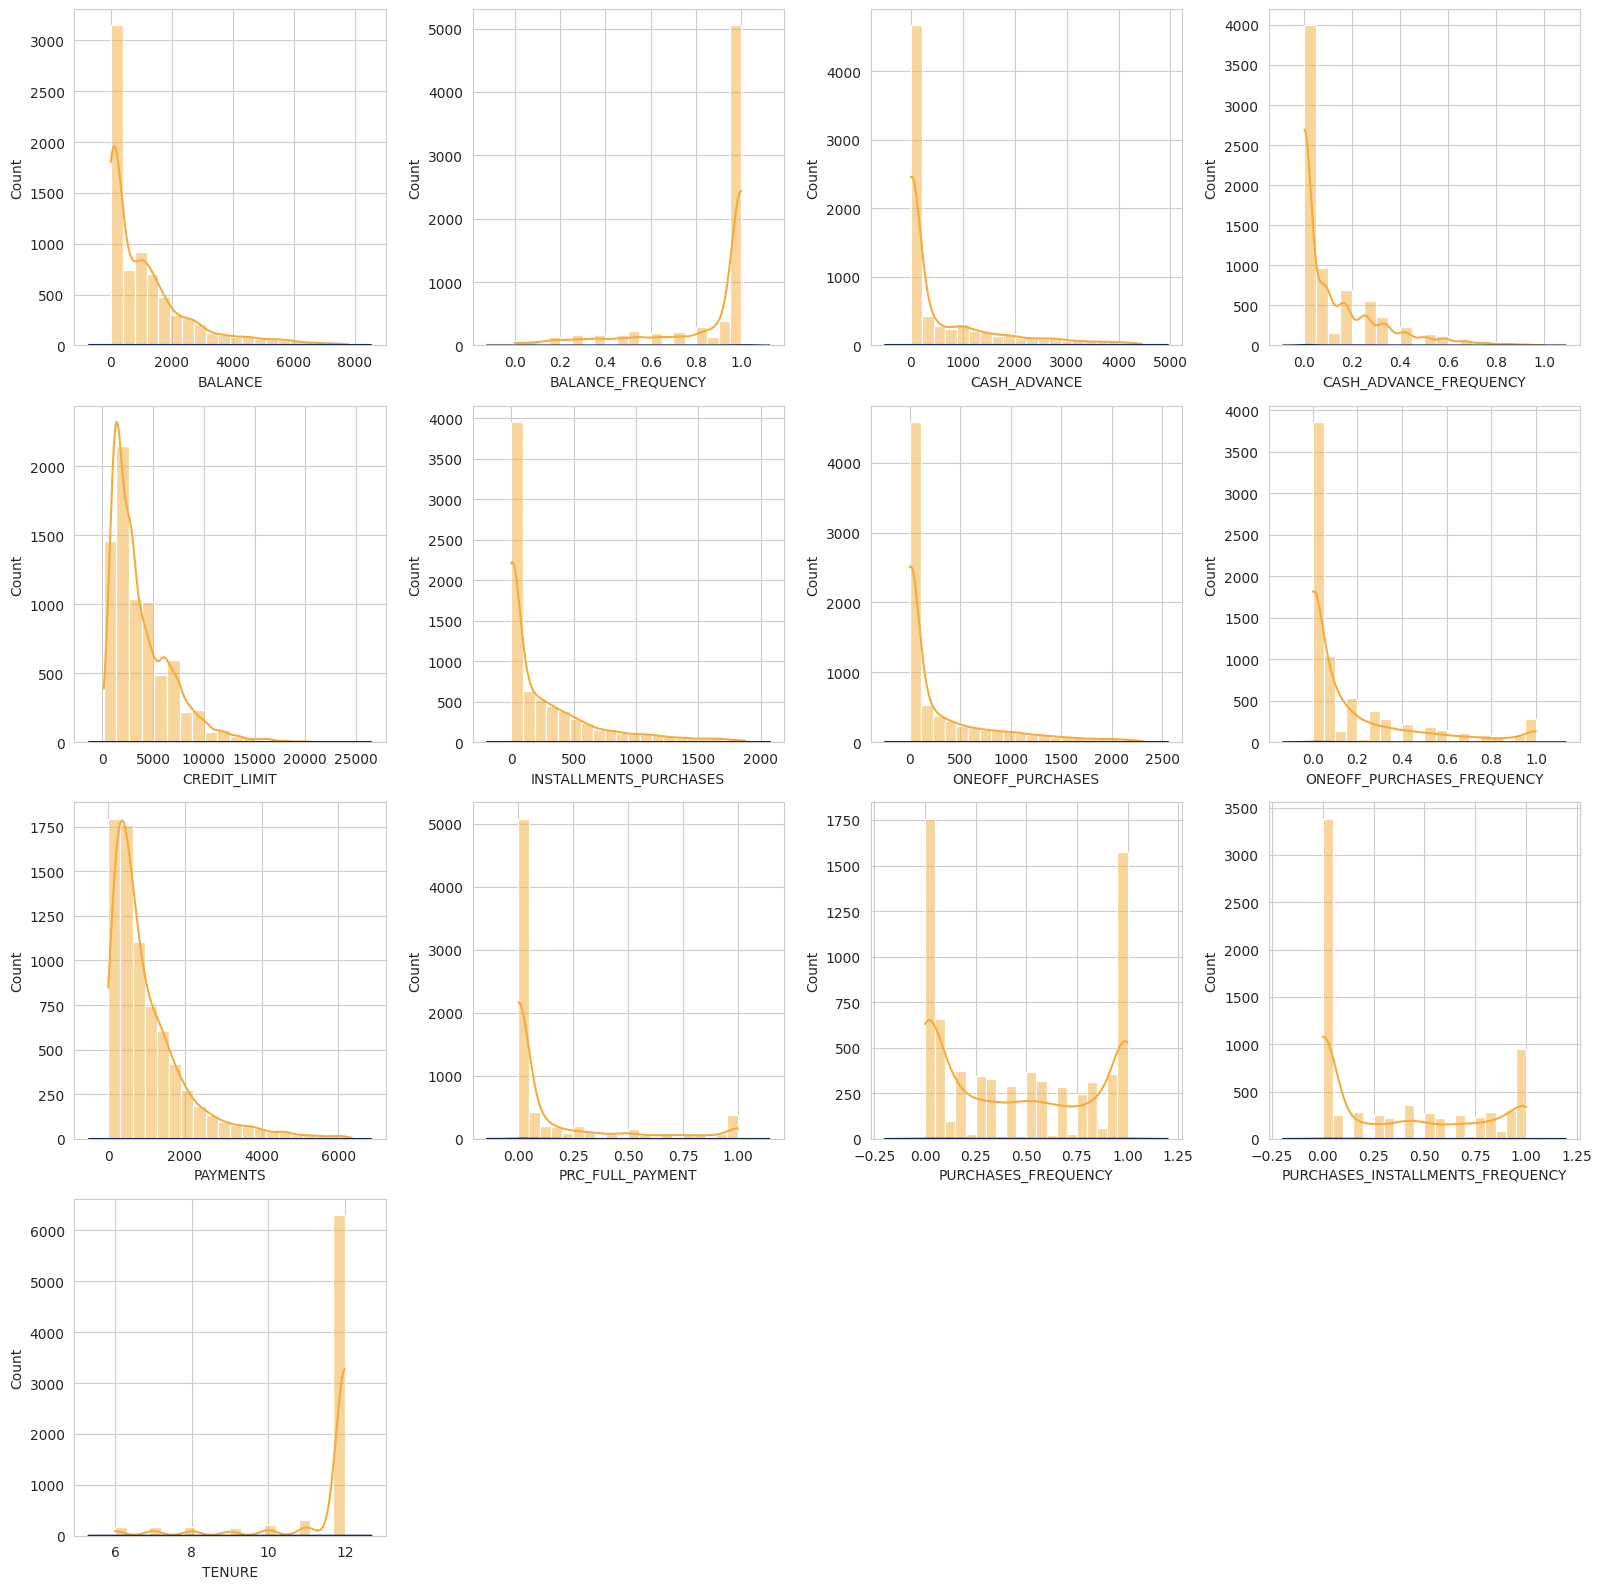

In [ ]:
# Configurar el estilo de Seaborn
sns.set_style("whitegrid")

# Crear subplots para cada variable numérica
fig = plt.figure(figsize=(16, 16))

for i, col in enumerate(numeric_columns):
    ax = plt.subplot(4, 4, i + 1)
    sns.histplot(data_new[col], bins=20, kde=True, color="#F3AC3D")
    sns.kdeplot(data_new[col], color="#0C2054", ax=ax)

# Ajustar automáticamente el espaciado de los subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()

### <font color='0C2054'> **Diagrama de Cajas y Bigotes - Actualizado** </font>

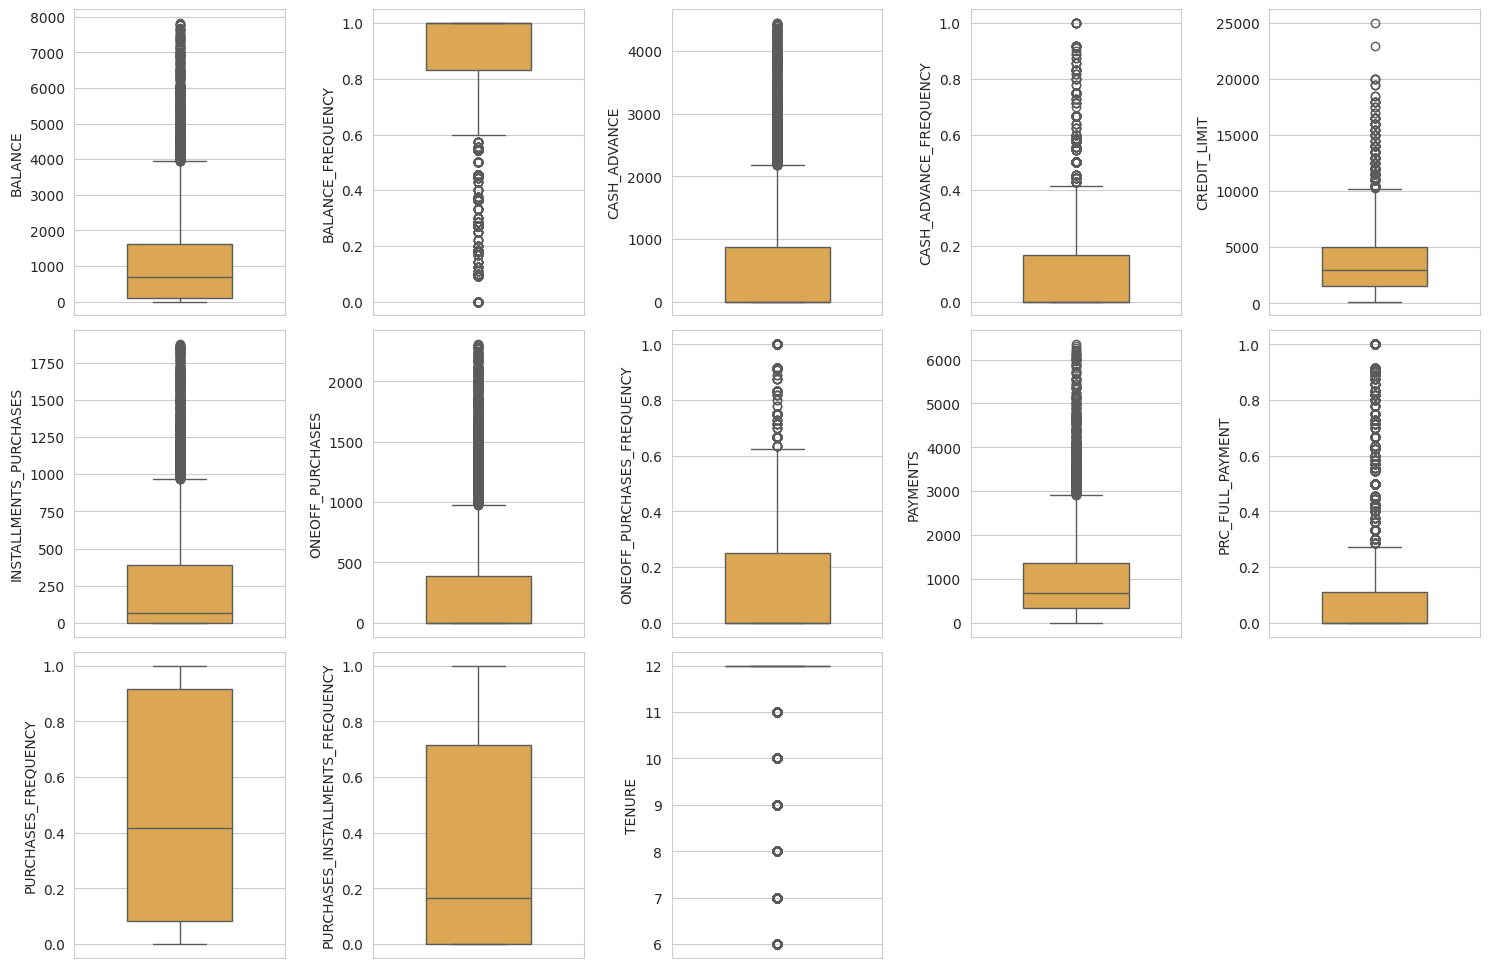

In [ ]:
# Definir el tamaño de la figura
plt.figure(figsize=(15, 13))

# Iterar sobre las variables numéricas y crear boxplots
for i in range(len(numeric_columns)):
    plt.subplot(4, 5, i + 1)
    sns.boxplot(y=data_new[numeric_columns[i]], orient='v', width=0.5, color='#F3AC3D')
    plt.tight_layout()

plt.show()

## <font color='0C2054'> **AJUSTE THRESHOLD** </font>

In [ ]:
inf1 = (data_new['BALANCE'] > 4000).sum()
inf2 = (data_new['ONEOFF_PURCHASES'] > 1000).sum()
inf3 = (data_new['INSTALLMENTS_PURCHASES'] > 1000).sum()
inf4 = (data_new['CASH_ADVANCE'] > 2200).sum()
inf5 = (data_new['PAYMENTS'] > 3000).sum()

print("Cantidad:", inf1, inf2, inf3, inf4, inf5)

Cantidad: 473 805 532 707 425


In [ ]:
# Definir una función para manejar los valores que superan un umbral
def handle_threshold(column, threshold):
    column = column.where(column <= threshold, threshold)
    return column

# Umbral para cada variable
thresholds = {'BALANCE': 4000, 'ONEOFF_PURCHASES': 1000, 'INSTALLMENTS_PURCHASES': 1000, 'CASH_ADVANCE': 2200, 'PAYMENTS': 3000}

# Aplicar la función para cada variable
for col, threshold in thresholds.items():
    data_new[col] = handle_threshold(data_new[col], threshold)

Con el ajuste threshold, lo que se busca es llevar todas esos datos extremos hasta el límite superior del bigote y así tratar estos datos atípicos.

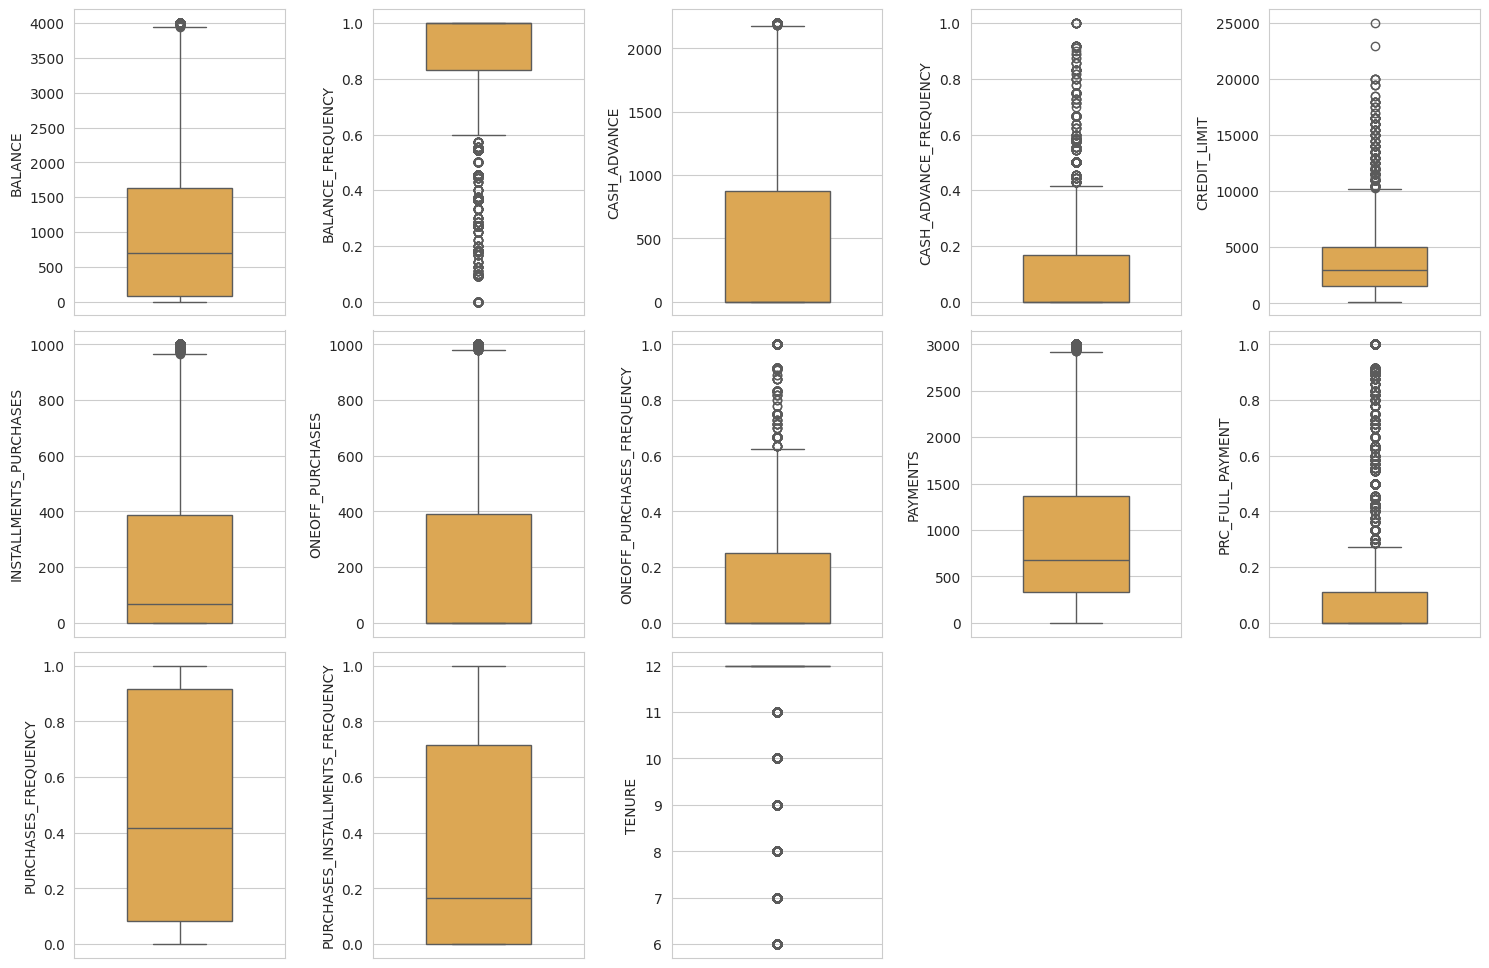

In [ ]:
# Definir el tamaño de la figura
plt.figure(figsize=(15, 13))

# Iterar sobre las variables numéricas y crear boxplots
for i in range(len(numeric_columns)):
    plt.subplot(4, 5, i + 1)
    sns.boxplot(y=data_new[numeric_columns[i]], orient='v', width=0.5, color='#F3AC3D')
    plt.tight_layout()

plt.show()

In [ ]:
data_new.describe()

BALANCE  BALANCE_FREQUENCY  CASH_ADVANCE  CASH_ADVANCE_FREQUENCY  \
count  7490.000000        7490.000000   7490.000000             7490.000000   
mean   1085.985466           0.865017    500.215497                0.117753   
std    1195.921317           0.248080    760.337605                0.177163   
min       0.000000           0.000000      0.000000                0.000000   
25%      87.073085           0.833333      0.000000                0.000000   
50%     691.877978           1.000000      0.000000                0.000000   
75%    1631.287182           1.000000    872.952745                0.166667   
max    4000.000000           1.000000   2200.000000                1.000000   

       CREDIT_LIMIT  INSTALLMENTS_PURCHASES  ONEOFF_PURCHASES  \
count   7489.000000             7490.000000       7490.000000   
mean    3766.066709              235.822096        239.386932   
std     2991.487889              318.789098        353.296565   
min      150.000000                0.000000          0.000000   
25%     1500.000000                0.000000          0.000000   
50%     3000.000000               68.815000          0.000000   
75%     5000.000000              386.262500        391.615000   
max    25000.000000             1000.000000       1000.000000   

       ONEOFF_PURCHASES_FREQUENCY     PAYMENTS  PRC_FULL_PAYMENT  \
count                 7490.000000  7490.000000       7490.000000   
mean                     0.165667   955.943836          0.145032   
std                      0.264895   824.035703          0.284565   
min                      0.000000     0.000000          0.000000   
25%                      0.000000   328.866380          0.000000   
50%                      0.000000   681.433219          0.000000   
75%                      0.250000  1364.274492          0.111111   
max                      1.000000  3000.000000          1.000000   

       PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY       TENURE  
count          7490.000000                       7490.000000  7490.000000  
mean              0.462509                          0.342310    11.491188  
std               0.393383                          0.387184     1.371160  
min               0.000000                          0.000000     6.000000  
25%               0.083333                          0.000000    12.000000  
50%               0.416667                          0.166667    12.000000  
75%               0.916667                          0.714286    12.000000  
max               1.000000                          1.000000    12.000000

### <font color='0C2054'> **Tratamiento de Faltantes** </font>

In [ ]:
data_clean = data_new.dropna()
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7489 entries, 0 to 8949
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           7489 non-null   float64
 1   BALANCE_FREQUENCY                 7489 non-null   float64
 2   CASH_ADVANCE                      7489 non-null   float64
 3   CASH_ADVANCE_FREQUENCY            7489 non-null   float64
 4   CREDIT_LIMIT                      7489 non-null   float64
 5   INSTALLMENTS_PURCHASES            7489 non-null   float64
 6   ONEOFF_PURCHASES                  7489 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        7489 non-null   float64
 8   PAYMENTS                          7489 non-null   float64
 9   PRC_FULL_PAYMENT                  7489 non-null   float64
 10  PURCHASES_FREQUENCY               7489 non-null   float64
 11  PURCHASES_INSTALLMENTS_FREQUENCY  7489 non-null   float64
 12  TENURE     

## <font color='0C2054'> **ESTANDARIZACIÓN DE VARIABLES** </font>

In [ ]:
# Seleccionar solo las variables especificadas para estandarizar
variables_to_scale = ['BALANCE', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'INSTALLMENTS_PURCHASES', 'ONEOFF_PURCHASES', 'PAYMENTS', 'TENURE']
data_to_scale = data_clean[variables_to_scale]

# Usar el método StandardScaler y aplicarlo a los datos seleccionados
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_to_scale)

# Convertir la matriz escalada en un DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=variables_to_scale, index=data_to_scale.index)

# Combinar el DataFrame escalado con el resto de las variables del conjunto de datos
data_scaled = pd.concat([data_clean.drop(columns=variables_to_scale), scaled_df], axis=1)

data_scaled = data_scaled.sort_index(axis=1)

data_scaled

BALANCE  BALANCE_FREQUENCY  CASH_ADVANCE  CASH_ADVANCE_FREQUENCY  \
0    -0.874040           0.818182     -0.657949                0.000000   
2     1.178251           1.000000     -0.657949                0.000000   
3     0.485461           0.636364     -0.387292                0.083333   
4    -0.224453           1.000000     -0.657949                0.000000   
5     0.605173           1.000000     -0.657949                0.000000   
...        ...                ...           ...                     ...   
8945 -0.884415           1.000000     -0.657949                0.000000   
8946 -0.892200           1.000000     -0.657949                0.000000   
8947 -0.888675           0.833333     -0.657949                0.000000   
8948 -0.896988           0.833333     -0.609866                0.166667   
8949 -0.596576           0.666667     -0.490863                0.333333   

      CREDIT_LIMIT  INSTALLMENTS_PURCHASES  ONEOFF_PURCHASES  \
0        -0.924708               -0.440601         -0.677692   
2         1.248269               -0.739869          1.510820   
3         1.248269               -0.739869          2.152878   
4        -0.857847               -0.739869         -0.632403   
5        -0.657264                2.397116         -0.677692   
...            ...                     ...               ...   
8945     -0.924708                0.173370         -0.677692   
8946     -0.924708                0.201226         -0.677692   
8947     -0.924708               -0.286889         -0.677692   
8948     -1.091860               -0.739869         -0.677692   
8949     -0.857847               -0.739869          2.152878   

      ONEOFF_PURCHASES_FREQUENCY  PAYMENTS  PRC_FULL_PAYMENT  \
0                       0.000000 -0.915415              0.00   
2                       1.000000 -0.405362              0.00   
3                       0.083333 -1.160332              0.00   
4                       0.083333 -0.337073              0.00   
5                       0.000000  0.538844              0.00   
...                          ...       ...               ...   
8945                    0.000000 -0.765175              0.50   
8946                    0.000000 -0.825533              0.00   
8947                    0.000000 -1.061697              0.25   
8948                    0.000000 -1.096554              0.25   
8949                    0.666667 -1.083671              0.00   

      PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY    TENURE  
0                0.166667                          0.083333  0.370944  
2                1.000000                          0.000000  0.370944  
3                0.083333                          0.000000  0.370944  
4                0.083333                          0.000000  0.370944  
5                0.666667                          0.583333  0.370944  
...                   ...                               ...       ...  
8945             1.000000                          0.833333 -4.009607  
8946             1.000000                          0.833333 -4.009607  
8947             0.833333                          0.666667 -4.009607  
8948             0.000000                          0.000000 -4.009607  
8949             0.666667                          0.000000 -4.009607  

[7489 rows x 13 columns]

## <font color='0C2054'> **REDUCCIÓN DE LA DIMENSIONALIDAD** </font>

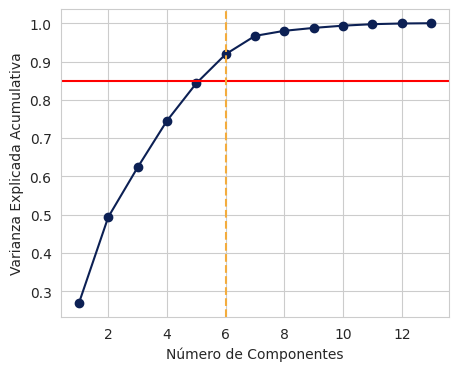

In [ ]:
# Inicializar PCA
pca = PCA()

# Ajustar PCA en los datos escalados
pca.fit(data_scaled)

# Calcular la varianza explicada acumulativa
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Encontrar el número de componentes necesarios para explicar el 85% de la varianza
n_components_85 = np.argmax(cumulative_variance >= 0.85) + 1

# Graficar la varianza explicada acumulativa
plt.figure(figsize=(5, 4))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-', color = '#0C2054')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulativa')

# Dibujar una línea horizontal en el 85% de la varianza explicada
plt.axhline(y=0.85, color='r', linestyle='-')
plt.axvline(x=n_components_85, color='#F3AC3D', linestyle='--')

plt.grid(True)
plt.show()

In [ ]:
#Cree un dataset reducido que proporcione el 85% de la varianza de entrada que debe explicarse
pca = PCA(n_components = 0.85, random_state= 12).fit(data_scaled)

#Veamos cuántas componentes ha conservado PCA:
pca.n_components_

6

Las 6 primeras componentes principales son las que dan una varianza explicada del 85%.

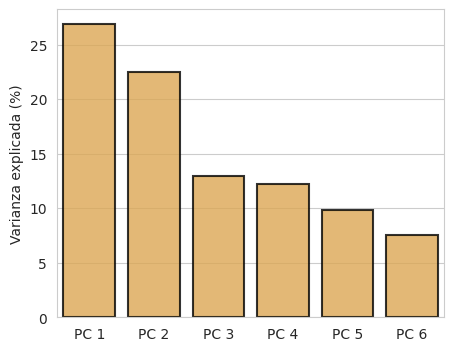

In [ ]:
# --- Varianza explicada ---
PCA_variance = pd.DataFrame({'Varianza explicada (%)':
                             pca.explained_variance_ratio_*100})

fig, ax = plt.subplots(1, 1, figsize = (5, 4))

bar = sns.barplot(x = ['PC ' + str(i) for i in range(1, 7)],
                  y = PCA_variance['Varianza explicada (%)'],
                  linewidth = 1.5, edgecolor = 'k', color='#F3AC3D',
                  alpha = 0.8)

plt.show()

In [ ]:
PCA_variance

Varianza explicada (%)
0               26.894388
1               22.487372
2               12.961856
3               12.185240
4                9.791855
5                7.588699

Utilizando las 3 primeras componentes se reduce la reducción de la dimensionalidad que explica al rededor del 62% de la varianza.

**PCA:** Este gráfico muestra la cantidad de varianza explicada por cada componente principal (PC) en un análisis de componentes principales (PCA).

El PC1 explica alrededor del 26% de la varianza total, lo cual sugiere que captura una cantidad significativa de la variabilidad en los datos. Los PC siguientes explican gradualmente menos varianza, con el PC2 explicando aproximadamente un poco menos que el PC1, y así sucesivamente.

In [ ]:
#Por último, transforme "data_scaled_df"
X_pca = pca.fit_transform(data_scaled)
X_pca

array([[-1.75800767, -0.16665553, -0.77169306,  0.01314517, -0.31088989,
         0.04482295],
       [ 1.19803917,  0.41482239, -0.50945079,  1.908638  ,  0.75211005,
        -0.99842051],
       [ 0.66922679,  0.35528794, -0.5057669 ,  2.40844378,  0.78586737,
        -0.86347152],
       ...,
       [-2.70191188, -0.71531403,  3.23213739,  0.25454767,  0.96728058,
         0.05437558],
       [-2.83466104, -1.329908  ,  3.03378164,  0.68963593,  0.69322798,
         0.22555509],
       [-1.62528034, -0.22365794,  3.77297356,  2.55376479,  0.1207362 ,
        -0.83796188]])

## <font color='0C2054'> **K-MEANS** </font>

In [ ]:
# Número optimo de K
inertia_list = []

for i in range(1, 7):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=12)
    kmeans.fit(data_scaled)
    inertia_list.append(kmeans.inertia_)

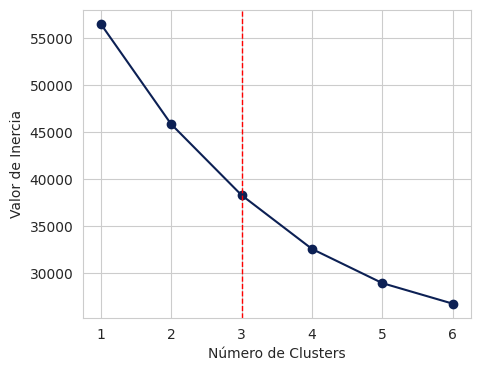

In [ ]:
# Graficar la curva de inercia
plt.figure(figsize=(5, 4))
plt.plot(range(1, 7), inertia_list, color="#0C2054")
plt.scatter(range(1, 7), inertia_list, color="#0C2054")
plt.xlabel("Número de Clusters", size=10)
plt.ylabel("Valor de Inercia", size=10)

# Seleccionar automáticamente el número k
kl = KneeLocator(range(1, 7), inertia_list, curve="convex", direction="decreasing")

# Obtener el codo
codo = kl.elbow

# Dibujar una línea punteada en el punto del codo
plt.axvline(x=codo, color='red', linestyle='--', linewidth=1)

plt.show()

**Clusters:** En este gráfico, se puede observar que a medida que aumenta el número de clústeres, el valor de la inercia tiende a disminuir.

Sin embargo, hay un punto en el gráfico donde la disminución en la inercia comienza a ser menos significativa. Este punto se conoce como "codo" y es donde añadir más clústeres no produce una reducción sustancial en la inercia. En este caso, parece que el codo está alrededor de 3 o 4 clústeres, lo que sugiere que estos valores podrían ser opciones razonables para el número de clústeres en el análisis de K-Means.

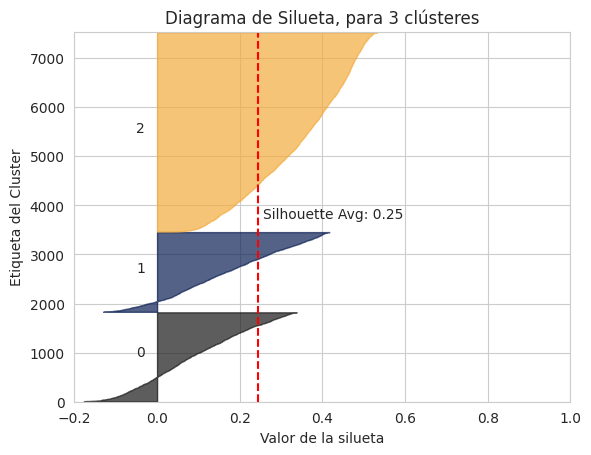

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

n_clusters=3

# Crear y ajustar el modelo de KMeans con 3 clusters
kmeans = KMeans(n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(data_scaled)

# Calcular el puntaje de la silueta promedio
silhouette_avg = silhouette_score(data_scaled, cluster_labels)

# Calcular los valores de la silueta para cada muestra
sample_silhouette_values = silhouette_samples(data_scaled, cluster_labels)

# Crear una figura de subgráficos
fig, ax = plt.subplots()

# Configurar los límites de los ejes y el espacio entre los clusters
ax.set_xlim([-0.2, 1])
ax.set_ylim([0, len(data_scaled) + (n_clusters + 1) * 10])

# Calcular y dibujar la silueta para cada muestra
y_lower = 10
for i in range(n_clusters):
    # Agregar la silueta de cada muestra perteneciente a un cluster i
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    # Colores modificados
    color = ['#191919', '#0C2054', '#F3AC3D','#CCCCCC'][i]
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Etiquetar los clusters en el gráfico
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Calcular el nuevo y_lower para el siguiente cluster
    y_lower = y_upper + 10  # 10 para los espacios en blanco

# Dibujar una línea vertical en el puntaje de la silueta promedio
ax.axvline(x=silhouette_avg, color="r", linestyle="--")

# Etiquetar el puntaje de la silueta promedio
ax.text(silhouette_avg + 0.01, len(data_scaled) / 2, 'Silhouette Avg: {:.2f}'.format(silhouette_avg))

# Configurar etiquetas y título del gráfico
ax.set_xlabel("Valor de la silueta")
ax.set_ylabel("Etiqueta del Cluster")
ax.set_title(f"Diagrama de Silueta, para {n_clusters} clústeres")

plt.show()

In [ ]:
kmeans_constants = {"init": "k-means++", "n_init": 100, "max_iter": 1000, "random_state": 42}

# --- Modelo K-means ---
model_kmeans = KMeans(n_clusters, **kmeans_constants)
model_kmeans.fit(data_scaled)

KMeans(max_iter=1000, n_clusters=3, n_init=100, random_state=42)

In [ ]:
# --- Evaluación del modelo K-MEANS ---
print(" ### K-MEANS ###")
print('Inertia: {:.2f}'.format(model_kmeans.inertia_))
print('Silhouette Score: {:.2f}'.format(silhouette_score(data_scaled, model_kmeans.labels_))) #Entre -1 y 1, más cerca a 1 mejor
print('Calinski harabasz score: {:.2f}'.format(calinski_harabasz_score(data_scaled, model_kmeans.labels_))) #Entre más grande, mejor

 ### K-MEANS ###
Inertia: 38302.52
Silhouette Score: 0.25
Calinski harabasz score: 1781.39


**Inertia:** Punto de referencia

**Silhouette Score:** El Silhouette Score de 0.25, lo que significa que los clusters están algo separados pero podrían mejorarse para aumentar la cohesión intra-cluster y la separación inter-cluster.

**Calinski-Harabasz Score:** Punto de referencia

In [ ]:
# Predicción de los clusters
Cluster_1 = model_kmeans.fit_predict(data_scaled)
Cluster_1

array([2, 0, 0, ..., 2, 2, 2], dtype=int32)

In [ ]:
# Vamos a adjuntar 'Cluster_1' como una nueva variable a 'data_scaled':
df_final = data_scaled.copy()
df_final['Cluster_1']= Cluster_1

# A partir de ahora, sólo trabajaremos con "df_final"
df_final.head()

BALANCE  BALANCE_FREQUENCY  CASH_ADVANCE  CASH_ADVANCE_FREQUENCY  \
0 -0.874040           0.818182     -0.657949                0.000000   
2  1.178251           1.000000     -0.657949                0.000000   
3  0.485461           0.636364     -0.387292                0.083333   
4 -0.224453           1.000000     -0.657949                0.000000   
5  0.605173           1.000000     -0.657949                0.000000   

   CREDIT_LIMIT  INSTALLMENTS_PURCHASES  ONEOFF_PURCHASES  \
0     -0.924708               -0.440601         -0.677692   
2      1.248269               -0.739869          1.510820   
3      1.248269               -0.739869          2.152878   
4     -0.857847               -0.739869         -0.632403   
5     -0.657264                2.397116         -0.677692   

   ONEOFF_PURCHASES_FREQUENCY  PAYMENTS  PRC_FULL_PAYMENT  \
0                    0.000000 -0.915415               0.0   
2                    1.000000 -0.405362               0.0   
3                    0.083333 -1.160332               0.0   
4                    0.083333 -0.337073               0.0   
5                    0.000000  0.538844               0.0   

   PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY    TENURE  Cluster_1  
0             0.166667                          0.083333  0.370944          2  
2             1.000000                          0.000000  0.370944          0  
3             0.083333                          0.000000  0.370944          0  
4             0.083333                          0.000000  0.370944          2  
5             0.666667                          0.583333  0.370944          0

In [ ]:
df_final.Cluster_1.value_counts()

Cluster_1
2    4053
0    1812
1    1624
Name: count, dtype: int64

### <font color='0C2054'> **Dataset Reducido** </font>

In [ ]:
# Número optimo de K
inertia_list = []

for i in range(1, 7):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=12)
    kmeans.fit(X_pca)
    inertia_list.append(kmeans.inertia_)

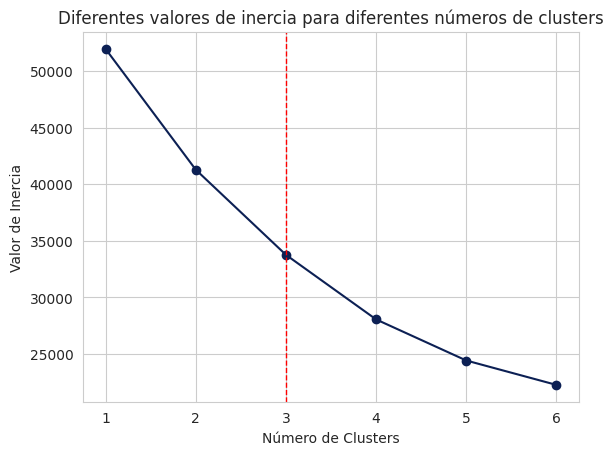

In [ ]:
# Graficar la curva de inercia
plt.plot(range(1, 7), inertia_list, color="#0C2054")
plt.scatter(range(1, 7), inertia_list, color="#0C2054")
plt.xlabel("Número de Clusters", size=10)
plt.ylabel("Valor de Inercia", size=10)
plt.title("Diferentes valores de inercia para diferentes números de clusters", size=12)

# Seleccionar automáticamente el número k
kl = KneeLocator(range(1, 7), inertia_list, curve="convex", direction="decreasing")

# Obtener el codo
codo = kl.elbow

# Dibujar una línea punteada en el punto del codo
plt.axvline(x=codo, color='red', linestyle='--', linewidth=1)

plt.show()

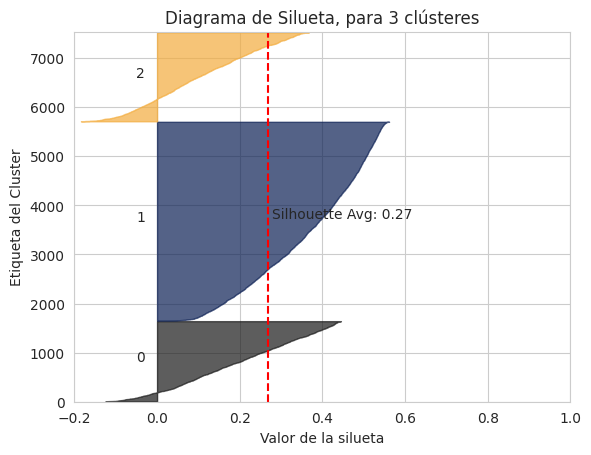

In [ ]:
n_clusters=3

# Crear y ajustar el modelo de KMeans con 3 clusters
kmeans = KMeans(n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_pca)

# Calcular el puntaje de la silueta promedio
silhouette_avg = silhouette_score(X_pca, cluster_labels)

# Calcular los valores de la silueta para cada muestra
sample_silhouette_values = silhouette_samples(X_pca, cluster_labels)

# Crear una figura de subgráficos
fig, ax = plt.subplots()

# Configurar los límites de los ejes y el espacio entre los clusters
ax.set_xlim([-0.2, 1])
ax.set_ylim([0, len(X_pca) + (n_clusters + 1) * 10])

# Calcular y dibujar la silueta para cada muestra
y_lower = 10
for i in range(n_clusters):
    # Agregar la silueta de cada muestra perteneciente a un cluster i
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    # Colores modificados
    color = ['#191919', '#0C2054', '#F3AC3D', '#CCCCCC'][i]
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Etiquetar los clusters en el gráfico
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Calcular el nuevo y_lower para el siguiente cluster
    y_lower = y_upper + 10  # 10 para los espacios en blanco

# Dibujar una línea vertical en el puntaje de la silueta promedio
ax.axvline(x=silhouette_avg, color="r", linestyle="--")

# Etiquetar el puntaje de la silueta promedio
ax.text(silhouette_avg + 0.01, len(X_pca) / 2, 'Silhouette Avg: {:.2f}'.format(silhouette_avg))

# Configurar etiquetas y título del gráfico
ax.set_xlabel("Valor de la silueta")
ax.set_ylabel("Etiqueta del Cluster")
ax.set_title(f"Diagrama de Silueta, para {n_clusters} clústeres")

plt.show()


In [ ]:
kmeans_constants = {"init": "k-means++", "n_init": 100, "max_iter": 1000, "random_state": 42}

# --- Modelo K-means ---
model_kmeans_pca = KMeans(n_clusters = 3, **kmeans_constants)
model_kmeans_pca.fit(X_pca)

KMeans(max_iter=1000, n_clusters=3, n_init=100, random_state=42)

In [ ]:
# --- Evaluación del modelo K-MEANS ---
print(" ### K-MEANS ###")
print('Inertia:  {:.2f}'.format(model_kmeans_pca.inertia_))
print('Silhouette Score: {:.2f}'.format(silhouette_score(X_pca, model_kmeans_pca.labels_)))
print('Calinski harabasz score: {:.2f}'.format(calinski_harabasz_score(X_pca, model_kmeans_pca.labels_)))

 ### K-MEANS ###
Inertia:  33768.02
Silhouette Score: 0.27
Calinski harabasz score: 2016.25


Al comparar los dos conjuntos de resultados de K-Means, podemos notar algunas diferencias significativas en las métricas de evaluación de clustering.

**Inertia:** El valor de la inercia en el segundo conjunto de resultados (33768.02) es significativamente menor que en el primero (38302.52). Esto sugiere que los clusters en el segundo conjunto están más cohesionados, ya que la suma de las distancias cuadradas dentro de los clusters es menor.

**Silhouette Score:** El Silhouette Score en el segundo conjunto de resultados (0.27) también es mayor que en el primero (0.25). Un Silhouette Score más alto indica una mejor separación entre los clusters y una mejor cohesión dentro de los clusters. Por lo tanto, el segundo conjunto de resultados muestra una mejor calidad de clustering en términos de separación y cohesión.

**Calinski-Harabasz Score:** El Calinski-Harabasz Score en el segundo conjunto de resultados (2016.25) es mayor que en el primero (1781.39). Un valor más alto de Calinski-Harabasz Score indica clusters más densos y mejor separados. Por lo tanto, el segundo conjunto de resultados también sugiere una mejor estructura de clustering en comparación con el primero.

In [ ]:
# Predicción de los clusters
Cluster_2 = model_kmeans.fit_predict(X_pca)

df_final['Cluster_2']= Cluster_2

# A partir de ahora, sólo trabajaremos con "df_final"
df_final.head(3)

BALANCE  BALANCE_FREQUENCY  CASH_ADVANCE  CASH_ADVANCE_FREQUENCY  \
0 -0.874040           0.818182     -0.657949                0.000000   
2  1.178251           1.000000     -0.657949                0.000000   
3  0.485461           0.636364     -0.387292                0.083333   

   CREDIT_LIMIT  INSTALLMENTS_PURCHASES  ONEOFF_PURCHASES  \
0     -0.924708               -0.440601         -0.677692   
2      1.248269               -0.739869          1.510820   
3      1.248269               -0.739869          2.152878   

   ONEOFF_PURCHASES_FREQUENCY  PAYMENTS  PRC_FULL_PAYMENT  \
0                    0.000000 -0.915415               0.0   
2                    1.000000 -0.405362               0.0   
3                    0.083333 -1.160332               0.0   

   PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY    TENURE  Cluster_1  \
0             0.166667                          0.083333  0.370944          2   
2             1.000000                          0.000000  0.370944          0   
3             0.083333                          0.000000  0.370944          0   

   Cluster_2  
0          1  
2          0  
3          0

In [ ]:
df_final['Cluster_2'].value_counts()

Cluster_2
1    4045
0    1807
2    1637
Name: count, dtype: int64

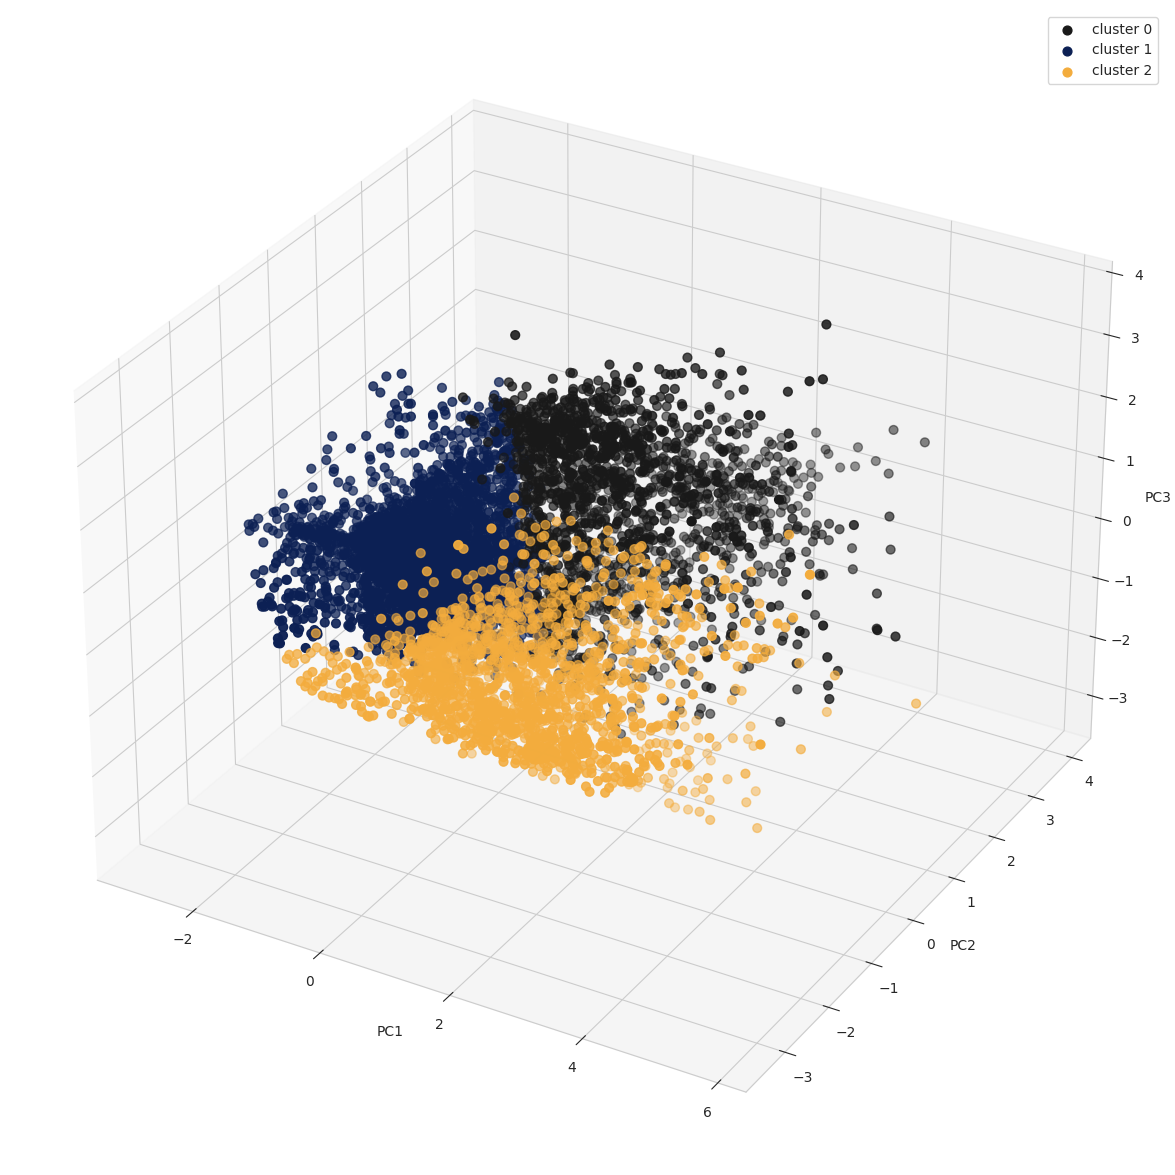

In [ ]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[Cluster_2 == 0,0],X_pca[Cluster_2 == 0,1],X_pca[Cluster_2 == 0,3], s = 40 , color = '#191919', label = "cluster 0")
ax.scatter(X_pca[Cluster_2 == 1,0],X_pca[Cluster_2 == 1,1],X_pca[Cluster_2 == 1,3], s = 40 , color = '#0C2054', label = "cluster 1")
ax.scatter(X_pca[Cluster_2 == 2,0],X_pca[Cluster_2 == 2,1],X_pca[Cluster_2 == 2,3], s = 40 , color = '#F3AC3D', label = "cluster 2")
#ax.scatter(X_pca[Cluster_2 == 3,0],X_pca[Cluster_2 == 3,1],X_pca[Cluster_2 == 3,3], s = 40 , color = '#CCCCCC', label = "cluster 3")
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend()
plt.show()

#191919', '#0C2054', '#F3AC3D', '#CCCCCC

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

# Add scatter traces for each cluster
for cluster_id in range(n_clusters):
    fig.add_trace(go.Scatter3d(
        x=X_pca[Cluster_2 == cluster_id, 0],
        y=X_pca[Cluster_2 == cluster_id, 1],
        z=X_pca[Cluster_2 == cluster_id, 2],
        mode='markers',
        marker=dict(size=5, color=['#191919', '#0C2054', '#F3AC3D', '#CCCCCC'][cluster_id]),
        name=f'Cluster {cluster_id}'
    ))

    # Calculate centroid for the current cluster
    centroid = X_pca[Cluster_2 == cluster_id].mean(axis=0)
    fig.add_trace(go.Scatter3d(
        x=[centroid[0]],
        y=[centroid[1]],
        z=[centroid[2]],
        mode='markers',
        marker=dict(size=5, color='red', symbol='x'),
        name=f'Centroide {cluster_id}'
    ))

# Update layout
fig.update_layout(
    scene=dict(
        xaxis_title='PC1',
        yaxis_title='PC2',
        zaxis_title='PC3'
    ),
    margin=dict(l=0, r=0, b=0, t=0),
    legend=dict(
        title="Clusters",
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=0.01
    )
)

# Show the figure
fig.show()


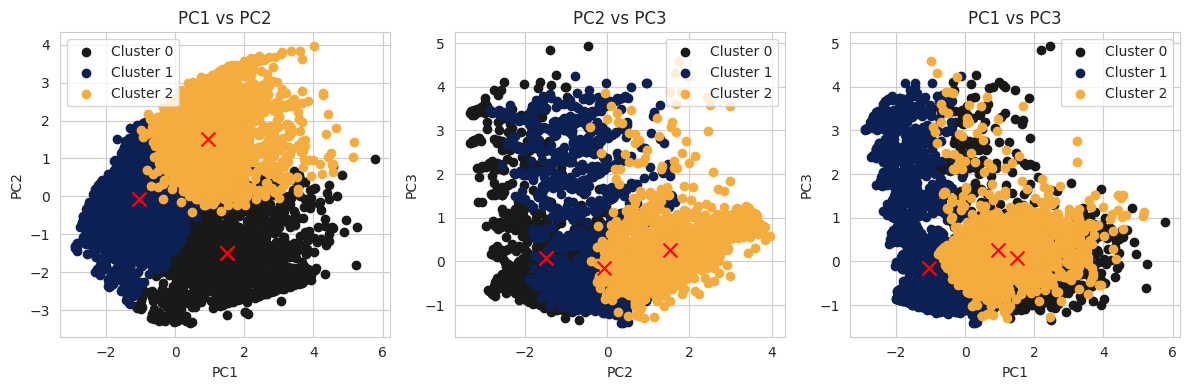

In [ ]:
# Ajusta el modelo K-Means a tus datos
kmeans = KMeans(n_clusters)  # Ajusta el número de clústeres según tu necesidad
kmeans.fit(X_pca)
Cluster_2 = kmeans.labels_

# Calcula los centroides
centroids = kmeans.cluster_centers_

# Define los colores para cada clúster
cluster_colors = ['#191919', '#0C2054', '#F3AC3D', '#CCCCCC']

# Gráficos de dispersión con clústeres y centroides

# Gráfico de PC1 vs PC2
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
for cluster_id in range(n_clusters):
    plt.scatter(X_pca[Cluster_2 == cluster_id, 0], X_pca[Cluster_2 == cluster_id, 1], label=f'Cluster {cluster_id}', color=cluster_colors[cluster_id])
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, color='red')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PC1 vs PC2')
plt.legend()

# Gráfico de PC2 vs PC3
plt.subplot(1, 3, 2)
for cluster_id in range(n_clusters):
    plt.scatter(X_pca[Cluster_2 == cluster_id, 1], X_pca[Cluster_2 == cluster_id, 2], label=f'Cluster {cluster_id}', color=cluster_colors[cluster_id])
    plt.scatter(centroids[:, 1], centroids[:, 2], marker='x', s=100, color='red')
plt.xlabel('PC2')
plt.ylabel('PC3')
plt.title('PC2 vs PC3')
plt.legend()

# Gráfico de PC1 vs PC3
plt.subplot(1, 3, 3)
for cluster_id in range(n_clusters):
    plt.scatter(X_pca[Cluster_2 == cluster_id, 0], X_pca[Cluster_2 == cluster_id, 2], label=f'Cluster {cluster_id}', color=cluster_colors[cluster_id])
    plt.scatter(centroids[:, 0], centroids[:, 2], marker='x', s=100, color='red')
plt.xlabel('PC1')
plt.ylabel('PC3')
plt.title('PC1 vs PC3')
plt.legend()

plt.tight_layout()
plt.show()



## <font color='0C2054'> **CLUSTERING JERÁRQUICO** </font>

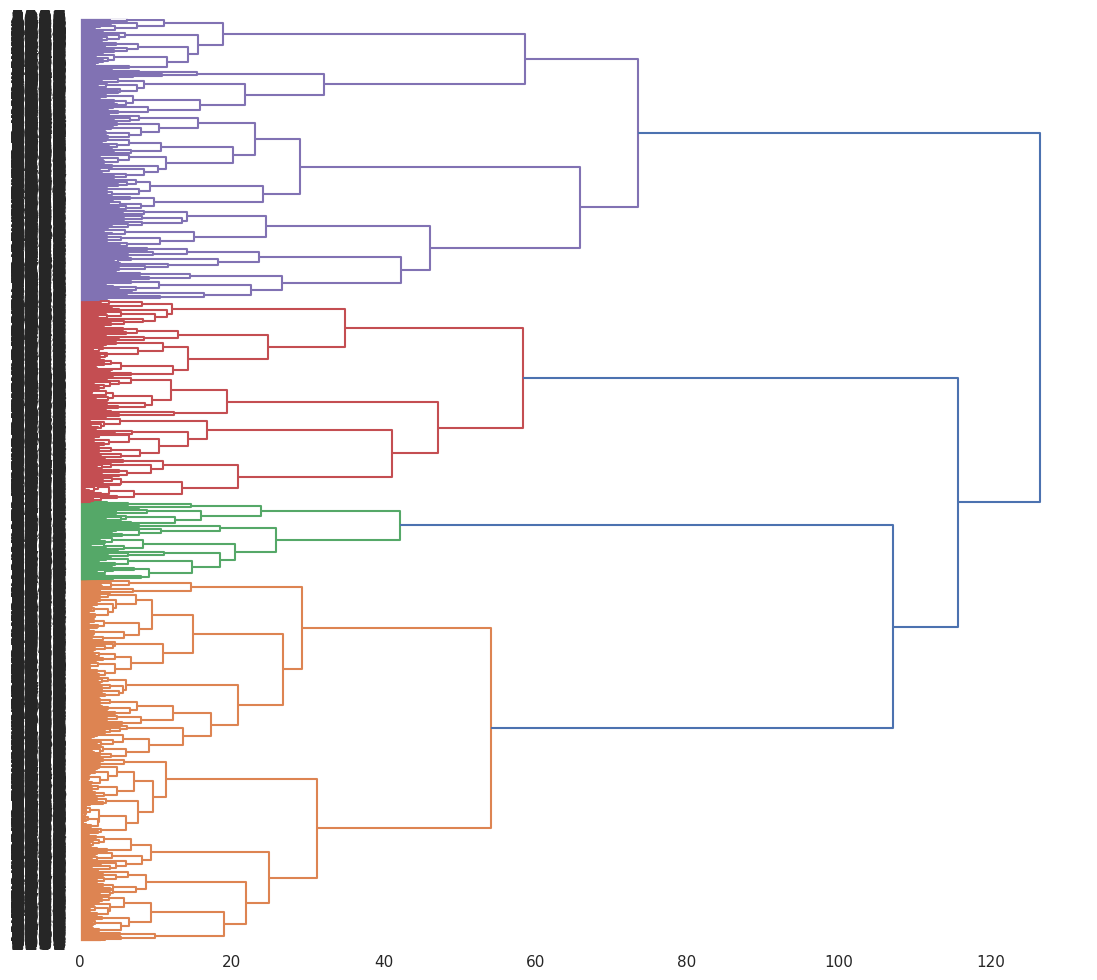

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
# Estilo de las gráficas
sns.set_theme()

# Función de vinculación para agrupar datos según similud
Z = linkage(data_scaled, method='ward')

plt.figure(figsize=(13, 12))
dendrogram(
    Z,
    orientation='right',
    distance_sort='descending',
    show_leaf_counts=False,
    leaf_font_size=16,
)
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering

model_hc = AgglomerativeClustering(n_clusters = 4, metric = 'euclidean', linkage = 'ward')
model_hc.fit(data_scaled)

# --- Evaluación del modelo kmeans ---
print(" ### HIERARCHICAL CLUSTERING ###")
print('Silhouette Score: ', silhouette_score(data_scaled, model_hc.labels_))
print('Calinski harabasz score: ', calinski_harabasz_score(data_scaled, model_hc.labels_))

 ### HIERARCHICAL CLUSTERING ###
Silhouette Score:  0.18855411452735693
Calinski harabasz score:  1414.0404292569738


In [ ]:
# Predicción de los clusters
Cluster_3 = model_hc.fit_predict(data_scaled)

df_final['Cluster_3']= Cluster_3

# A partir de ahora, sólo trabajaremos con "df_final"
df_final.head(3)

BALANCE  BALANCE_FREQUENCY  CASH_ADVANCE  CASH_ADVANCE_FREQUENCY  \
0 -0.874040           0.818182     -0.657949                0.000000   
2  1.178251           1.000000     -0.657949                0.000000   
3  0.485461           0.636364     -0.387292                0.083333   

   CREDIT_LIMIT  INSTALLMENTS_PURCHASES  ONEOFF_PURCHASES  \
0     -0.924708               -0.440601         -0.677692   
2      1.248269               -0.739869          1.510820   
3      1.248269               -0.739869          2.152878   

   ONEOFF_PURCHASES_FREQUENCY  PAYMENTS  PRC_FULL_PAYMENT  \
0                    0.000000 -0.915415               0.0   
2                    1.000000 -0.405362               0.0   
3                    0.083333 -1.160332               0.0   

   PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY    TENURE  Cluster_1  \
0             0.166667                          0.083333  0.370944          2   
2             1.000000                          0.000000  0.370944          0   
3             0.083333                          0.000000  0.370944          0   

   Cluster_2  Cluster_3  
0          1          1  
2          0          0  
3          0          0

### <font color='0C2054'> **DBSCAN** </font>

In [ ]:
from sklearn.neighbors import NearestNeighbors

# --- Selección de hiperparámetros eps ---

# --- Gráfica de distancias K --
neighbors = NearestNeighbors(n_neighbors = 2)
neighbors.fit(data_scaled)

distances, *other = neighbors.kneighbors(data_scaled)
distances = distances[:, 1]
print(distances.shape)
distances = np.sort(distances, axis = 0)

(7489,)


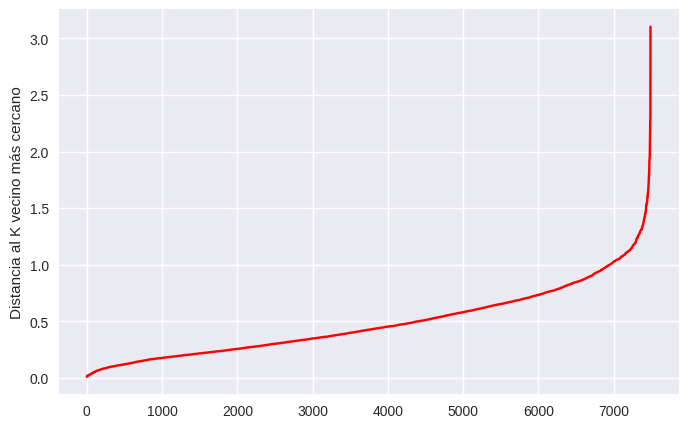

In [ ]:
plt.style.use('seaborn')
plt.figure(figsize = (8, 5))
plt.plot(distances, color = 'red')
plt.ylabel('Distancia al K vecino más cercano')
plt.show()

In [ ]:
# --- Selección del punto de curvatura máxima ---
kl = KneeLocator(range(len(distances)), distances, curve = 'convex', direction = 'increasing')
kl.elbow

7433

In [ ]:
# --- Epsilon óptimo --
epsilon = distances[kl.elbow]
epsilon

1.524355375222892

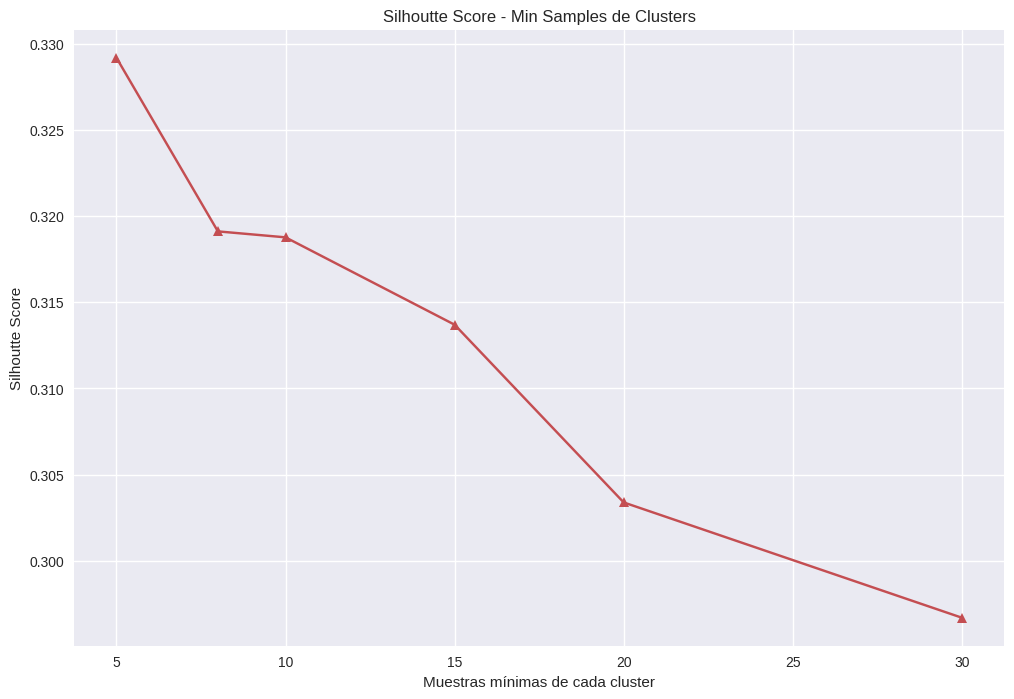

In [ ]:
# --- Selección de hiperparámetros min_sample ---
silhoutte_coefs = []

for min_points in [5, 8, 10, 15, 20, 30]:
    model_d = DBSCAN(eps = epsilon, min_samples = min_points)
    model_d.fit(data_scaled)
    silhoutte_coefs.append(silhouette_score(data_scaled, model_d.labels_))

plt.figure(figsize = (12, 8))
plt.plot([5, 8, 10, 15, 20, 30], silhoutte_coefs, color = 'r', marker = '^')
plt.xlabel('Muestras mínimas de cada cluster')
plt.ylabel('Silhoutte Score')
plt.title('Silhoutte Score - Min Samples de Clusters')
plt.show()

In [ ]:
# --- Modelo DBSCAN ---
model_db = DBSCAN(eps = epsilon, min_samples = 5, n_jobs=-1)
model_db.fit(data_scaled)

DBSCAN(eps=1.524355375222892, n_jobs=-1)

In [ ]:
# --- Evaluación del modelo DBSCAN ---
print(" ### DBSCAN ###")
print('Silhouette Score: ', silhouette_score(data_scaled, model_db.labels_))
print('Calinski harabasz score: ', calinski_harabasz_score(data_scaled, model_db.labels_))

 ### DBSCAN ###
Silhouette Score:  0.3292081725831727
Calinski harabasz score:  121.46966563290493


In [ ]:
# Predicción de los clusters
Cluster_4 = model_db.fit_predict(data_scaled)

df_final['Cluster_4']= Cluster_4

# A partir de ahora, sólo trabajaremos con "df_final"
df_final.head(3)

BALANCE  BALANCE_FREQUENCY  CASH_ADVANCE  CASH_ADVANCE_FREQUENCY  \
0 -0.874040           0.818182     -0.657949                0.000000   
2  1.178251           1.000000     -0.657949                0.000000   
3  0.485461           0.636364     -0.387292                0.083333   

   CREDIT_LIMIT  INSTALLMENTS_PURCHASES  ONEOFF_PURCHASES  \
0     -0.924708               -0.440601         -0.677692   
2      1.248269               -0.739869          1.510820   
3      1.248269               -0.739869          2.152878   

   ONEOFF_PURCHASES_FREQUENCY  PAYMENTS  PRC_FULL_PAYMENT  \
0                    0.000000 -0.915415               0.0   
2                    1.000000 -0.405362               0.0   
3                    0.083333 -1.160332               0.0   

   PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY    TENURE  Cluster_1  \
0             0.166667                          0.083333  0.370944          1   
2             1.000000                          0.000000  0.370944          2   
3             0.083333                          0.000000  0.370944          2   

   Cluster_2  Cluster_4  
0          1          0  
2          3          0  
3          3          0

In [ ]:
df_final['Cluster_4'].value_counts()

Cluster_4
 0    7386
-1     103
Name: count, dtype: int64

Dataset Reducido


In [ ]:
# --- Selección de hiperparámetros eps ---

# --- Gráfica de distancias K --
neighbors = NearestNeighbors(n_neighbors = 2)
neighbors.fit(X_pca)

distances, *other = neighbors.kneighbors(X_pca)
distances = distances[:, 1]
print(distances.shape)
distances = np.sort(distances, axis = 0)
distances

(7489,)


array([0.00814497, 0.00814497, 0.0081889 , ..., 2.18734941, 2.23546915,
       3.04823755])

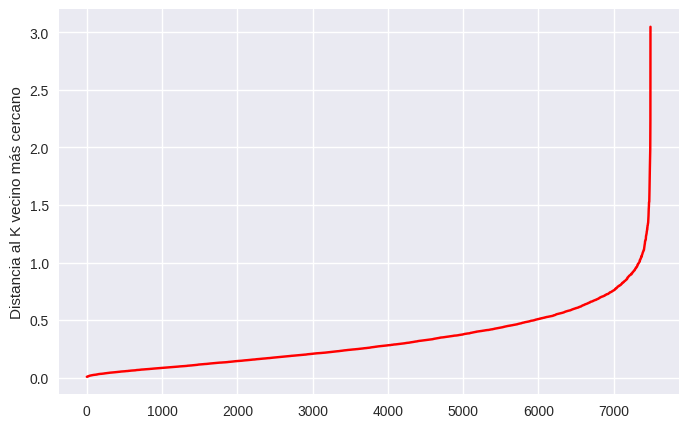

In [ ]:
plt.style.use('seaborn')
plt.figure(figsize = (8, 5))
plt.plot(distances, color = 'red')
plt.ylabel('Distancia al K vecino más cercano')
plt.show()

In [ ]:
# --- Selección del punto de curvatura máxima ---
kl = KneeLocator(range(len(distances)), distances, curve = 'convex', direction = 'increasing')
kl.elbow

7401

In [ ]:
# --- Epsilon óptimo --
epsilon = distances[kl.elbow]
epsilon

1.1087736479158452

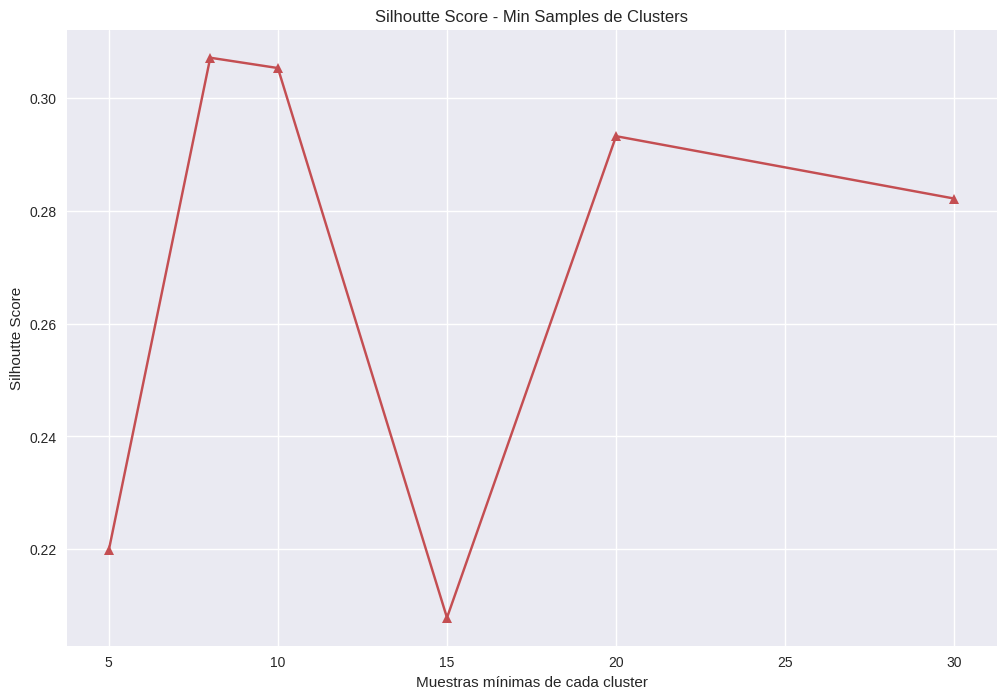

In [ ]:
# --- Selección de hiperparámetros min_sample ---
silhoutte_coefs = []

for min_points in [5, 8, 10, 15, 20, 30]:
    model_d = DBSCAN(eps = epsilon, min_samples = min_points)
    model_d.fit(X_pca)
    silhoutte_coefs.append(silhouette_score(X_pca, model_d.labels_))

plt.figure(figsize = (12, 8))
plt.plot([5, 8, 10, 15, 20, 30], silhoutte_coefs, color = 'r', marker = '^')
plt.xlabel('Muestras mínimas de cada cluster')
plt.ylabel('Silhoutte Score')
plt.title('Silhoutte Score - Min Samples de Clusters')
plt.show()

In [ ]:
# --- Modelo DBSCAN ---
model_db_pca = DBSCAN(eps = epsilon, min_samples = 5)
model_db_pca.fit(X_pca)

DBSCAN(eps=1.1087736479158452)

In [ ]:

# --- Evaluación del modelo DBSCAN ---
print(" ### DBSCAN ###")
print('Silhouette Score: ', silhouette_score(X_pca, model_db_pca.labels_))
print('Calinski harabasz score: ', calinski_harabasz_score(X_pca, model_db_pca.labels_))

 ### DBSCAN ###
Silhouette Score:  0.2198305718128166
Calinski harabasz score:  75.60944744609218


In [ ]:
# Predicción de los clusters
Cluster_5 = model_db_pca.fit_predict(X_pca)

df_final['Cluster_5']= Cluster_5

# A partir de ahora, sólo trabajaremos con "df_final"
df_final.head(3)

BALANCE  BALANCE_FREQUENCY  CASH_ADVANCE  CASH_ADVANCE_FREQUENCY  \
0 -0.874040           0.818182     -0.657949                0.000000   
2  1.178251           1.000000     -0.657949                0.000000   
3  0.485461           0.636364     -0.387292                0.083333   

   CREDIT_LIMIT  INSTALLMENTS_PURCHASES  ONEOFF_PURCHASES  \
0     -0.924708               -0.440601         -0.677692   
2      1.248269               -0.739869          1.510820   
3      1.248269               -0.739869          2.152878   

   ONEOFF_PURCHASES_FREQUENCY  PAYMENTS  PRC_FULL_PAYMENT  \
0                    0.000000 -0.915415               0.0   
2                    1.000000 -0.405362               0.0   
3                    0.083333 -1.160332               0.0   

   PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY    TENURE  Cluster_1  \
0             0.166667                          0.083333  0.370944          1   
2             1.000000                          0.000000  0.370944          2   
3             0.083333                          0.000000  0.370944          2   

   Cluster_2  Cluster_4  Cluster_5  
0          1          0          0  
2          3          0          0  
3          3          0          0

In [ ]:
df_final['Cluster_5'].value_counts()

Cluster_5
 0    7283
-1     198
 2       5
 1       3
Name: count, dtype: int64

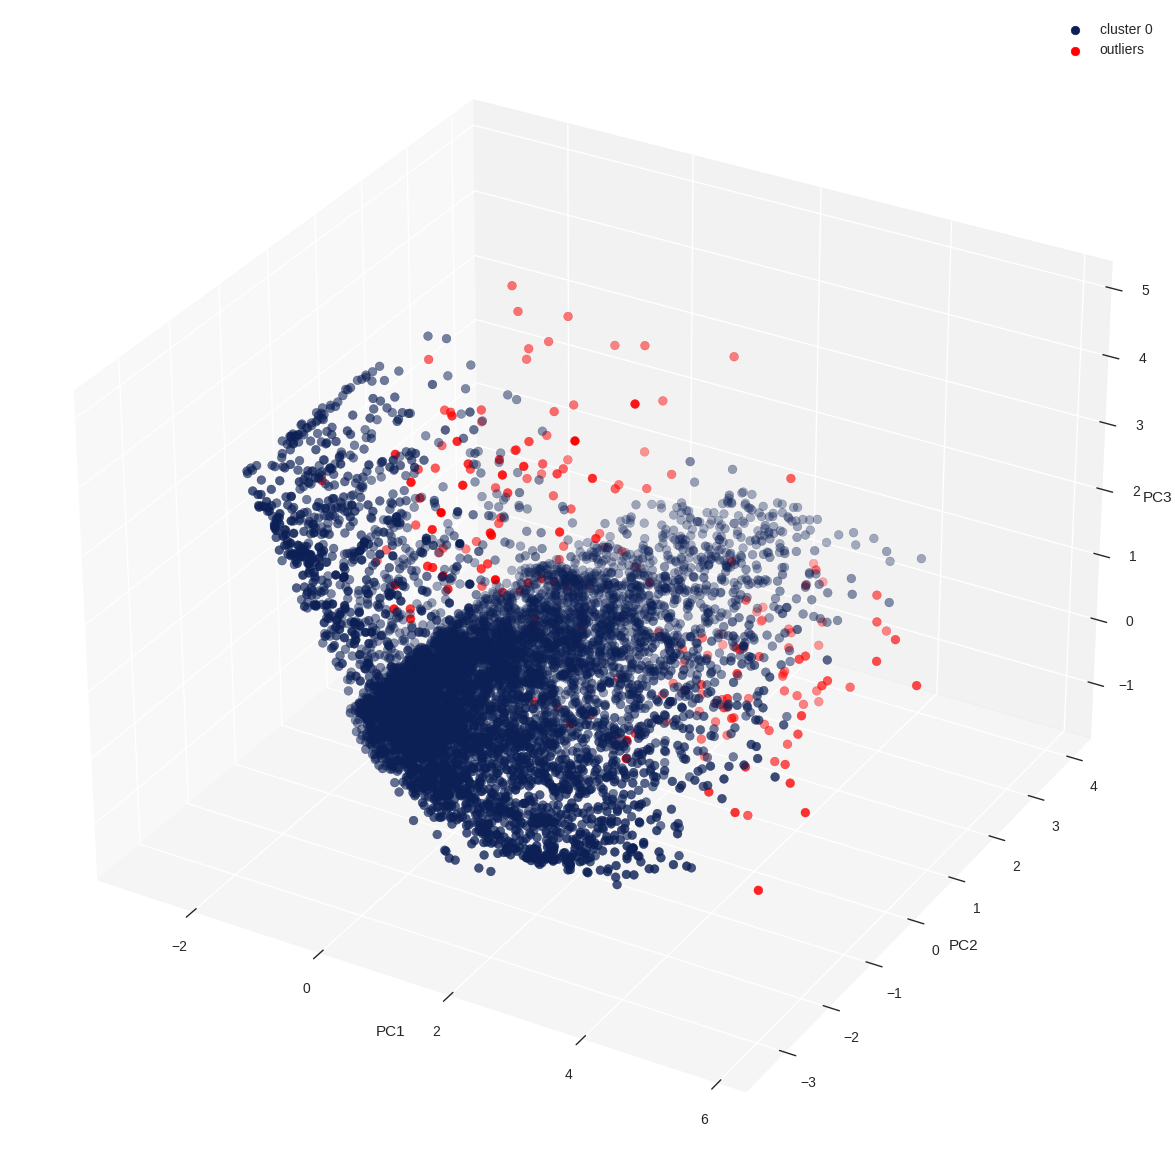

In [ ]:
# 3d scatterplot using matplotlib

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[Cluster_5 == 0, 0], X_pca[Cluster_5 == 0, 1], X_pca[Cluster_5 == 0, 2], s=40, color='#0c2056', label="cluster 0")
ax.scatter(X_pca[Cluster_5 == -1, 0], X_pca[Cluster_5 == -1, 1], X_pca[Cluster_5 == -1, 2], s=40, color='red', label="outliers")
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend()
ax.set_facecolor('none')
plt.show()

In [ ]:
# Scatter plot para el cluster 0
scatter_cluster0 = go.Scatter3d(
    x=X_pca[Cluster_5 == 0, 0],
    y=X_pca[Cluster_5 == 0, 1],
    z=X_pca[Cluster_5 == 0, 2],
    mode='markers',
    marker=dict(size=5, color='#0C2056'),
    name="Cluster 0"
)

# Scatter plot para los valores atípicos
scatter_outliers = go.Scatter3d(
    x=X_pca[Cluster_5 == -1, 0],
    y=X_pca[Cluster_5 == -1, 1],
    z=X_pca[Cluster_5 == -1, 2],
    mode='markers',
    marker=dict(size=5, color='red'),
    name="Outliers"
)

# Definir datos y trazas
data = [scatter_cluster0, scatter_outliers]

# Definir diseño del gráfico
layout = go.Layout(
    scene=dict(
        xaxis_title='PC1',
        yaxis_title='PC2',
        zaxis_title='PC3'
    ),
    margin=dict(l=0, r=0, b=0, t=0),
    legend=dict(
        title="Clusters",
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=0.01
    )
)

# Crear figura
fig = go.Figure(data=data, layout=layout)

# Mostrar la figura
fig.show()

### <font color='0C2054'> **GAUSSIAN MIXTURE** </font>

Dataset Original

Text(0.5, 0, 'Número de Clusters')

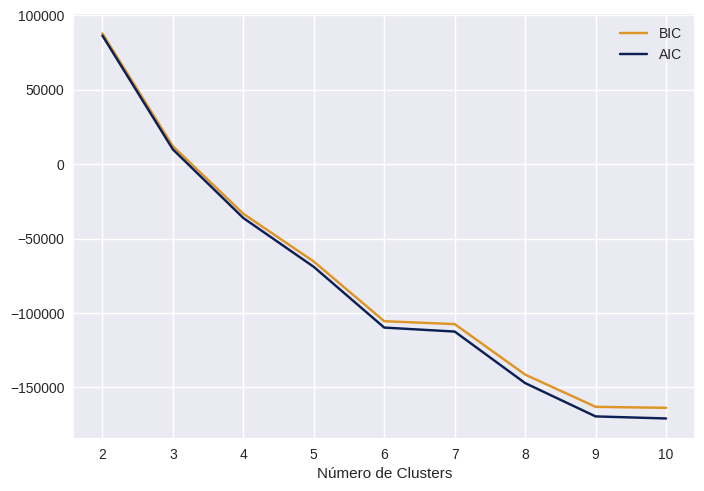

In [ ]:
# --- Estimación de hiperparámetros ---
n_components = np.arange(2, 11)

models_g = [GaussianMixture(n_components=n, random_state=123).fit(data_scaled_df) for n in n_components]

plt.plot(n_components, [m.bic(data_scaled_df) for m in models_g], label="BIC", color = "#DC9526")
plt.plot(n_components, [m.aic(data_scaled_df) for m in models_g], label="AIC", color = "#0C2056")
plt.legend()
plt.xlabel("Número de Clusters")

Según el gráfico, parece que el número óptimo de clusters es alrededor de 4 o 5. Esto se determina observando el punto donde tanto el BIC como el AIC alcanzan su valor mínimo y, después de este punto, la disminución en estos criterios es menos significativa.

Después de un cierto número de clusters (alrededor de 4 o 5 en este caso), la mejora en el ajuste del modelo no es tan relevante, lo que sugiere que añadir más clusters no proporciona beneficios significativos y puede conducir a un sobreajuste del modelo.


In [ ]:
# --- Modelo GMM ---
model_gmm = GaussianMixture(n_components=5, random_state=123, covariance_type = 'tied').fit(data_scaled_df)

In [ ]:
# --- Evaluación del modelo GMM ---
labels_ = model_gmm.predict(data_scaled_df)

print(" ### GMM ###")
print('Silhouette Score: ', silhouette_score(data_scaled_df, labels_))
print('Calinski harabasz score: ', calinski_harabasz_score(data_scaled_df, labels_))

 ### GMM ###
Silhouette Score:  0.15387345492562898
Calinski harabasz score:  789.9500592657996


In [ ]:
# Predicción de los clusters
Cluster_6 = model_gmm.fit_predict(data_scaled_df)

df_final['Cluster_6']= Cluster_6

# A partir de ahora, sólo trabajaremos con "df_final"
df_final.head(3)

BALANCE  BALANCE_FREQUENCY  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
0 -0.802536          -0.153950         -0.603999               -0.399792   
1  1.234388           0.561366          1.352330               -0.701198   
2  0.546785          -0.869265          3.188875               -0.701198   

   CASH_ADVANCE  PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
0     -0.597257            -0.730273                   -0.602574   
1     -0.597257             1.409708                    3.381399   
2     -0.332697            -0.944273                   -0.270578   

   PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  CREDIT_LIMIT  \
0                         -0.653864               -0.645391     -0.886128   
1                         -0.871633               -0.645391      1.424855   
2                         -0.871633               -0.148817      1.424855   

   PAYMENTS  PRC_FULL_PAYMENT    TENURE  Cluster_1  Cluster_2  Cluster_4  \
0 -0.804743         -0.508448  0.373834          0          2          0   
1 -0.299517         -0.508448  0.373834          1          3          0   
2 -1.047342         -0.508448  0.373834          0          2          0   

   Cluster_6  
0          2  
1          4  
2          2

Dataset Reducido

Text(0.5, 0, 'Número de Clusters')

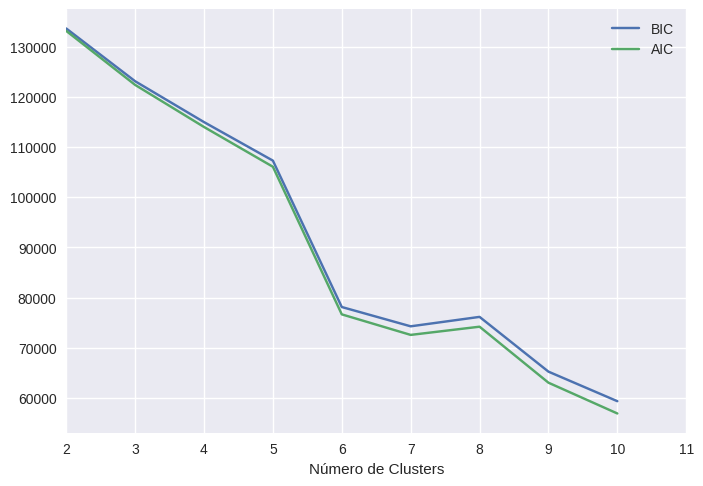

In [ ]:
# --- Estimación de hiperparámetros ---
n_components = np.arange(2, 11)

models_g = [GaussianMixture(n_components=n, random_state=123).fit(X_pca) for n in n_components]

plt.plot(n_components, [m.bic(X_pca) for m in models_g], label="BIC")
plt.plot(n_components, [m.aic(X_pca) for m in models_g], label="AIC")
plt.legend()
plt.xlim([2,11])
plt.xlabel("Número de Clusters")

In [ ]:
# --- Modelo GMM ---
model_gmm_pca = GaussianMixture(n_components=5, random_state=123, covariance_type = 'tied').fit(X_pca)

In [ ]:
# --- Evaluación del modelo GMM ---
labels_ = model_gmm_pca.predict(X_pca)

print(" ### DBSCAN ###")
print('Silhouette Score: ', silhouette_score(X_pca, labels_))
print('Calinski harabasz score: ', calinski_harabasz_score(X_pca, labels_))

 ### DBSCAN ###
Silhouette Score:  0.22726080894628597
Calinski harabasz score:  1645.320013969259


In [ ]:
# Predicción de los clusters
Cluster_7 = model_gmm_pca.fit_predict(X_pca)

df_final['Cluster_7'] = Cluster_7

# A partir de ahora, sólo trabajaremos con "df_final"
df_final.head(3)

BALANCE  BALANCE_FREQUENCY  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
0 -0.802536          -0.153950         -0.603999               -0.399792   
1  1.234388           0.561366          1.352330               -0.701198   
2  0.546785          -0.869265          3.188875               -0.701198   

   CASH_ADVANCE  PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
0     -0.597257            -0.730273                   -0.602574   
1     -0.597257             1.409708                    3.381399   
2     -0.332697            -0.944273                   -0.270578   

   PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  CREDIT_LIMIT  \
0                         -0.653864               -0.645391     -0.886128   
1                         -0.871633               -0.645391      1.424855   
2                         -0.871633               -0.148817      1.424855   

   PAYMENTS  PRC_FULL_PAYMENT    TENURE  Cluster_1  Cluster_2  Cluster_4  \
0 -0.804743         -0.508448  0.373834          0          2          0   
1 -0.299517         -0.508448  0.373834          1          3          0   
2 -1.047342         -0.508448  0.373834          0          2          0   

   Cluster_3  Cluster_5  Cluster_6  Cluster_7  
0          3          0          2          1  
1          1          0          4          2  
2          1          0          2          2

In [ ]:
df_final['Cluster_7'].value_counts()

Cluster_7
1    2826
3    1880
4     895
2     738
0     385
Name: count, dtype: int64

Alternativa de visualización

In [ ]:
!pip install plotly
import plotly.express as px

df_temp = pd.DataFrame({'x': X_pca[:, 0], 'y': X_pca[:, 1], 'z': X_pca[:, 2],'label': Cluster_7})
df_temp['label'] = df_temp['label'].astype(str)

fig = px.scatter_3d(df_temp, x="x", y="y", z="z", color="label")
fig.update_layout(width=1000, height=700)
fig.show(config={'displayModeBar': False})


NameError: name 'Cluster_7' is not defined

## <font color='0C2054'> **REDUCCIÓN DE DIMENSIONALIDAD** </font>

In [ ]:
#Cree un dataset reducido solo a 3 componentes
pca = PCA(n_components = 3).fit(data_scaled)

#Por último, transforme "train_df1"
X_pca = pca.fit_transform(data_scaled)
X_pca[:3]

array([[-1.75800767, -0.16665553, -0.77169306],
       [ 1.19803917,  0.41482239, -0.50945079],
       [ 0.66922679,  0.35528794, -0.5057669 ]])

In [ ]:
df_final = data_scaled.copy()
df_final['PCA1'] = X_pca[:,0]
df_final['PCA2'] = X_pca[:,1]
df_final['PCA3'] = X_pca[:,2]
df_final.head(3)

BALANCE  BALANCE_FREQUENCY  CASH_ADVANCE  CASH_ADVANCE_FREQUENCY  \
0 -0.874040           0.818182     -0.657949                0.000000   
2  1.178251           1.000000     -0.657949                0.000000   
3  0.485461           0.636364     -0.387292                0.083333   

   CREDIT_LIMIT  INSTALLMENTS_PURCHASES  ONEOFF_PURCHASES  \
0     -0.924708               -0.440601         -0.677692   
2      1.248269               -0.739869          1.510820   
3      1.248269               -0.739869          2.152878   

   ONEOFF_PURCHASES_FREQUENCY  PAYMENTS  PRC_FULL_PAYMENT  \
0                    0.000000 -0.915415               0.0   
2                    1.000000 -0.405362               0.0   
3                    0.083333 -1.160332               0.0   

   PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY    TENURE      PCA1  \
0             0.166667                          0.083333  0.370944 -1.758008   
2             1.000000                          0.000000  0.370944  1.198039   
3             0.083333                          0.000000  0.370944  0.669227   

       PCA2      PCA3  
0 -0.166656 -0.771693  
2  0.414822 -0.509451  
3  0.355288 -0.505767

In [ ]:
# --- Pesos de las variables que componen las componentes principales ---
pesos_pca = pd.DataFrame(pca.components_, columns = data_scaled.columns,
             index = ['PC 1', 'PC 2', 'PC 3']).round(2).T

pesos_pca

PC 1  PC 2  PC 3
BALANCE                           0.49 -0.33 -0.06
BALANCE_FREQUENCY                 0.05 -0.00 -0.00
CASH_ADVANCE                      0.36 -0.52  0.20
CASH_ADVANCE_FREQUENCY            0.05 -0.08  0.03
CREDIT_LIMIT                      0.45  0.12 -0.12
INSTALLMENTS_PURCHASES            0.12  0.55  0.24
ONEOFF_PURCHASES                  0.30  0.38  0.24
ONEOFF_PURCHASES_FREQUENCY        0.06  0.09  0.05
PAYMENTS                          0.52  0.14  0.16
PRC_FULL_PAYMENT                 -0.03  0.08  0.03
PURCHASES_FREQUENCY               0.01  0.22  0.09
PURCHASES_INSTALLMENTS_FREQUENCY -0.01  0.19  0.07
TENURE                            0.20  0.20 -0.89

## <font color='0C2054'> **K-MEANS 2** </font>

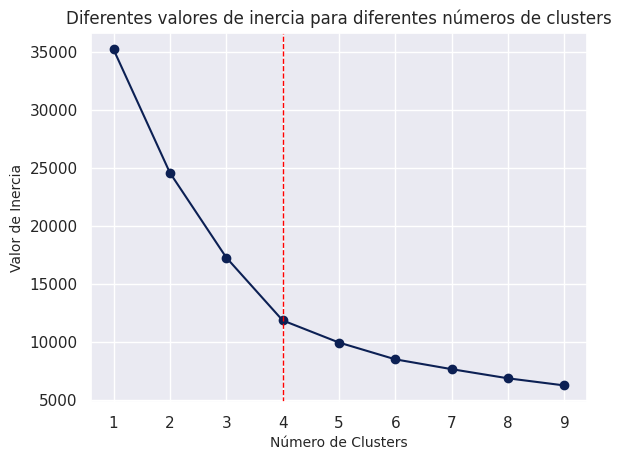

In [ ]:
# Número optimo de K
inertia_list = []

for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=3)
    kmeans.fit(X_pca)
    inertia_list.append(kmeans.inertia_)

# Graficar la curva de inercia
plt.figure(facecolor='none')  # Remove background color
plt.plot(range(1, 10), inertia_list, color="#0C2054")
plt.scatter(range(1, 10), inertia_list, color="#0C2054")
plt.xlabel("Número de Clusters", size=10)
plt.ylabel("Valor de Inercia", size=10)
plt.title("Diferentes valores de inercia para diferentes números de clusters", size=12)

# Seleccionar automáticamente el número k
kl = KneeLocator(range(1, 10), inertia_list, curve="convex", direction="decreasing")

# Obtener el codo
codo = kl.elbow

# Dibujar una línea punteada en el punto del codo
plt.axvline(x=codo, color='red', linestyle='--', linewidth=1)

plt.show()

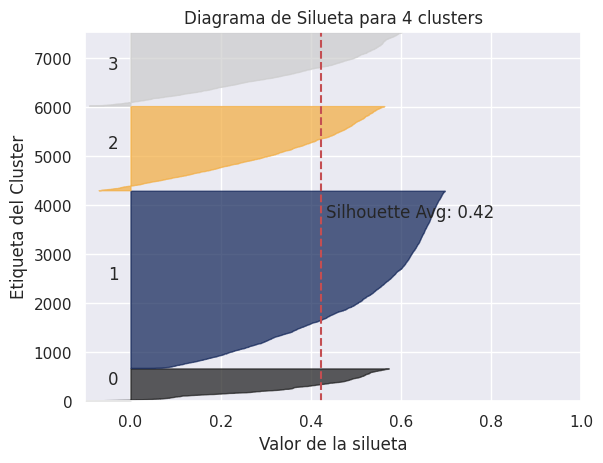

In [ ]:
n_clusters=4

# Crear y ajustar el modelo de KMeans con 3 clusters
kmeans = KMeans(n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_pca)

# Calcular el puntaje de la silueta promedio
silhouette_avg = silhouette_score(X_pca, cluster_labels)

# Calcular los valores de la silueta para cada muestra
sample_silhouette_values = silhouette_samples(X_pca, cluster_labels)

# Crear una figura de subgráficos
fig, ax = plt.subplots()

# Configurar los límites de los ejes y el espacio entre los clusters
ax.set_xlim([-0.1, 1])
ax.set_ylim([0, len(X_pca) + (n_clusters + 1) * 10])

# Calcular y dibujar la silueta para cada muestra
y_lower = 10
for i in range(n_clusters):
    # Agregar la silueta de cada muestra perteneciente a un cluster i
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    # Colores modificados
    color = ['#191919', '#0C2054', '#F3AC3D', '#CCCCCC'][i]
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Etiquetar los clusters en el gráfico
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Calcular el nuevo y_lower para el siguiente cluster
    y_lower = y_upper + 10  # 10 para los espacios en blanco

# Dibujar una línea vertical en el puntaje de la silueta promedio
ax.axvline(x=silhouette_avg, color="r", linestyle="--")

# Etiquetar el puntaje de la silueta promedio
ax.text(silhouette_avg + 0.01, len(X_pca) / 2, 'Silhouette Avg: {:.2f}'.format(silhouette_avg))

# Configurar etiquetas y título del gráfico
ax.set_xlabel("Valor de la silueta")
ax.set_ylabel("Etiqueta del Cluster")
ax.set_title("Diagrama de Silueta para 4 clusters")

plt.show()

In [ ]:
kmeans_constants = {"init": "k-means++", "n_init": 100, "max_iter": 1000, "random_state": 42}

# --- Modelo K-means ---
model_kmeans_2 = KMeans(n_clusters = 4, ** kmeans_constants)
model_kmeans_2.fit(X_pca)

KMeans(max_iter=1000, n_clusters=4, n_init=100, random_state=42)

In [ ]:
# --- Evaluación del modelo K-MEANS ---
print(" ### K-MEANS ###")
print('Inertia:  {:.2f}'.format(model_kmeans_2.inertia_))
print('Silhouette Score: {:.2f}'.format(silhouette_score(X_pca, model_kmeans_2.labels_)))
print('Calinski harabasz score: {:.2f}'.format(calinski_harabasz_score(X_pca, model_kmeans_2.labels_)))

 ### K-MEANS ###
Inertia:  11844.67
Silhouette Score: 0.42
Calinski harabasz score: 4928.89


In [ ]:
# Predicción de los clusters
Cluster_1 = model_kmeans.fit_predict(X_pca)

df_final['Cluster_1']= Cluster_1

# A partir de ahora, sólo trabajaremos con "df_final"
df_final.head(3)

BALANCE  BALANCE_FREQUENCY  CASH_ADVANCE  CASH_ADVANCE_FREQUENCY  \
0 -0.874040           0.818182     -0.657949                0.000000   
2  1.178251           1.000000     -0.657949                0.000000   
3  0.485461           0.636364     -0.387292                0.083333   

   CREDIT_LIMIT  INSTALLMENTS_PURCHASES  ONEOFF_PURCHASES  \
0     -0.924708               -0.440601         -0.677692   
2      1.248269               -0.739869          1.510820   
3      1.248269               -0.739869          2.152878   

   ONEOFF_PURCHASES_FREQUENCY  PAYMENTS  PRC_FULL_PAYMENT  \
0                    0.000000 -0.915415               0.0   
2                    1.000000 -0.405362               0.0   
3                    0.083333 -1.160332               0.0   

   PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY    TENURE      PCA1  \
0             0.166667                          0.083333  0.370944 -1.758008   
2             1.000000                          0.000000  0.370944  1.198039   
3             0.083333                          0.000000  0.370944  0.669227   

       PCA2      PCA3  Cluster_1  
0 -0.166656 -0.771693          1  
2  0.414822 -0.509451          2  
3  0.355288 -0.505767          2

In [ ]:
fig = go.Figure()

# Add scatter traces for each cluster
for cluster_id in range(4):
    fig.add_trace(go.Scatter3d(
        x=X_pca[Cluster_1 == cluster_id, 0],
        y=X_pca[Cluster_1 == cluster_id, 1],
        z=X_pca[Cluster_1 == cluster_id, 2],
        mode='markers',
        marker=dict(size=5, color=['#191919', '#0C2054', '#F3AC3D', '#CCCCCC'][cluster_id]),
        name=f'Cluster {cluster_id}'
    ))

    # Calculate centroid for the current cluster
    centroid = X_pca[Cluster_1 == cluster_id].mean(axis=0)
    fig.add_trace(go.Scatter3d(
        x=[centroid[0]],
        y=[centroid[1]],
        z=[centroid[2]],
        mode='markers',
        marker=dict(size=5, color='red', symbol='x'),
        name=f'Centroide {cluster_id}'
    ))

# Update layout
fig.update_layout(
    scene=dict(
        xaxis_title='PC1',
        yaxis_title='PC2',
        zaxis_title='PC3'
    ),
    margin=dict(l=0, r=0, b=0, t=0),
    legend=dict(
        title="Clusters",
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=0.01
    )
)

# Show the figure
fig.show()

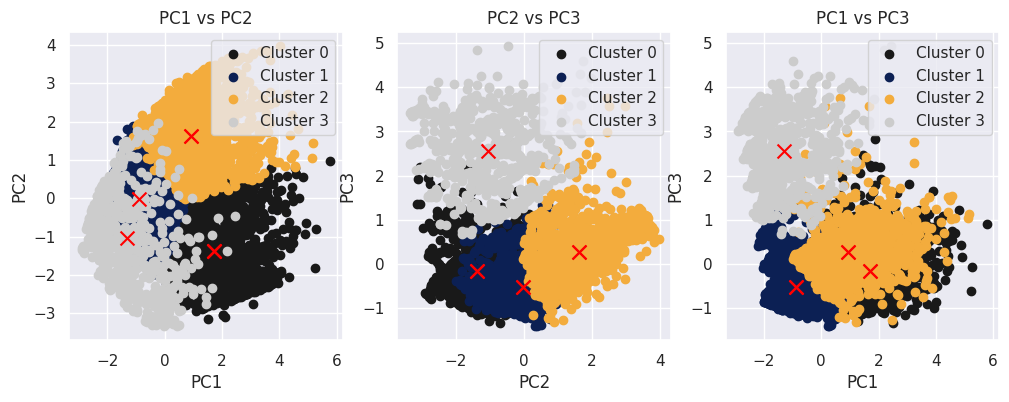

In [ ]:
# Ajusta el modelo K-Means a tus datos
kmeans = KMeans(n_clusters=4)  # Ajusta el número de clústeres según tu necesidad
kmeans.fit(X_pca)
Cluster_1 = kmeans.labels_

# Calcula los centroides
centroids = kmeans.cluster_centers_

# Define los colores para cada clúster
cluster_colors = ['#191919', '#0C2054', '#F3AC3D', '#CCCCCC']

# Gráficos de dispersión con clústeres y centroides

# Gráfico de PC1 vs PC2
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
for cluster_id in range(4):
    plt.scatter(X_pca[Cluster_1 == cluster_id, 0], X_pca[Cluster_1 == cluster_id, 1], label=f'Cluster {cluster_id}', color=cluster_colors[cluster_id])
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, color='red')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PC1 vs PC2')
plt.legend()

# Gráfico de PC2 vs PC3
plt.subplot(1, 3, 2)
for cluster_id in range(4):
    plt.scatter(X_pca[Cluster_1 == cluster_id, 1], X_pca[Cluster_1 == cluster_id, 2], label=f'Cluster {cluster_id}', color=cluster_colors[cluster_id])
    plt.scatter(centroids[:, 1], centroids[:, 2], marker='x', s=100, color='red')
plt.xlabel('PC2')
plt.ylabel('PC3')
plt.title('PC2 vs PC3')
plt.legend()

# Gráfico de PC1 vs PC3
plt.subplot(1, 3, 3)
for cluster_id in range(4):
    plt.scatter(X_pca[Cluster_1 == cluster_id, 0], X_pca[Cluster_1 == cluster_id, 2], label=f'Cluster {cluster_id}', color=cluster_colors[cluster_id])
    plt.scatter(centroids[:, 0], centroids[:, 2], marker='x', s=100, color='red')
plt.xlabel('PC1')
plt.ylabel('PC3')
plt.title('PC1 vs PC3')
plt.legend()

### <font color='0C2054'> **Interpretación de los Cluster** </font>

In [ ]:
# Seleccionar las últimas cuatro columnas de df_final
last_four_columns = df_final.iloc[:, -4:]

# Combinar df_clean con las últimas cuatro columnas de df_final
df_clust = pd.concat([data_clean, last_four_columns], axis=1)

df_clust

BALANCE  BALANCE_FREQUENCY  CASH_ADVANCE  CASH_ADVANCE_FREQUENCY  \
0       40.900749           0.818182      0.000000                0.000000   
2     2495.148862           1.000000      0.000000                0.000000   
3     1666.670542           0.636364    205.788017                0.083333   
4      817.714335           1.000000      0.000000                0.000000   
5     1809.828751           1.000000      0.000000                0.000000   
...           ...                ...           ...                     ...   
8945    28.493517           1.000000      0.000000                0.000000   
8946    19.183215           1.000000      0.000000                0.000000   
8947    23.398673           0.833333      0.000000                0.000000   
8948    13.457564           0.833333     36.558778                0.166667   
8949   372.708075           0.666667    127.040008                0.333333   

      CREDIT_LIMIT  INSTALLMENTS_PURCHASES  ONEOFF_PURCHASES  \
0           1000.0                   95.40              0.00   
2           7500.0                    0.00            773.17   
3           7500.0                    0.00           1000.00   
4           1200.0                    0.00             16.00   
5           1800.0                 1000.00              0.00   
...            ...                     ...               ...   
8945        1000.0                  291.12              0.00   
8946        1000.0                  300.00              0.00   
8947        1000.0                  144.40              0.00   
8948         500.0                    0.00              0.00   
8949        1200.0                    0.00           1000.00   

      ONEOFF_PURCHASES_FREQUENCY     PAYMENTS  PRC_FULL_PAYMENT  \
0                       0.000000   201.802084              0.00   
2                       1.000000   622.066742              0.00   
3                       0.083333     0.000000              0.00   
4                       0.083333   678.334763              0.00   
5                       0.000000  1400.057770              0.00   
...                          ...          ...               ...   
8945                    0.000000   325.594462              0.50   
8946                    0.000000   275.861322              0.00   
8947                    0.000000    81.270775              0.25   
8948                    0.000000    52.549959              0.25   
8949                    0.666667    63.165404              0.00   

      PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  TENURE      PCA1  \
0                0.166667                          0.083333      12 -1.758008   
2                1.000000                          0.000000      12  1.198039   
3                0.083333                          0.000000      12  0.669227   
4                0.083333                          0.000000      12 -1.115984   
5                0.666667                          0.583333      12  0.191041   
...                   ...                               ...     ...       ...   
8945             1.000000                          0.833333       6 -2.487561   
8946             1.000000                          0.833333       6 -2.505987   
8947             0.833333                          0.666667       6 -2.701912   
8948             0.000000                          0.000000       6 -2.834661   
8949             0.666667                          0.000000       6 -1.625280   

          PCA2      PCA3  Cluster_1  
0    -0.166656 -0.771693          1  
2     0.414822 -0.509451          2  
3     0.355288 -0.505767          2  
4    -0.465685 -0.795082          1  
5     1.349039  0.096615          2  
...        ...       ...        ...  
8945 -0.334037  3.423827          0  
8946 -0.366767  3.404681          0  
8947 -0.715314  3.232137          0  
8948 -1.329908  3.033782          0  
8949 -0.223658  3.772974          0  

[7489 rows x 17 columns]

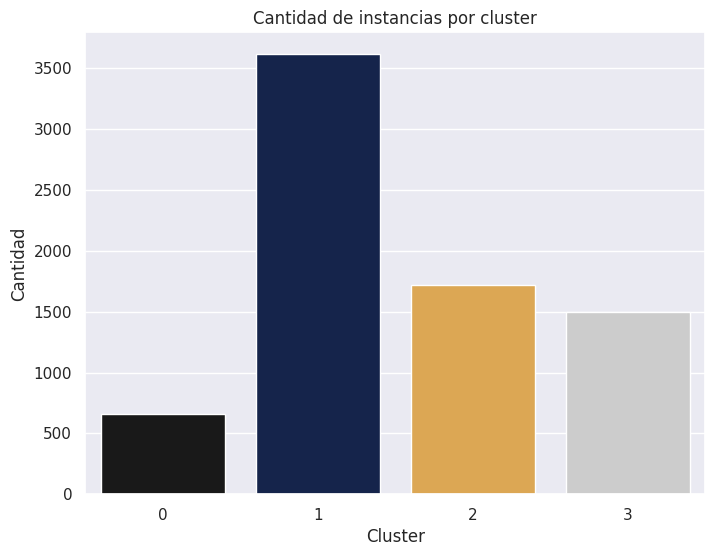

In [ ]:
# Contar la cantidad de instancias en cada cluster
cluster_counts = df_clust['Cluster_1'].value_counts()

# Definir los colores
colors = ['#191919', '#0C2054', '#F3AC3D', '#CCCCCC']

# Crear un gráfico de barras con los colores personalizados
plt.figure(figsize=(8, 6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette=colors)
plt.title('Cantidad de instancias por cluster')
plt.xlabel('Cluster')
plt.ylabel('Cantidad')
plt.show()

In [ ]:
cluster_means = df_clust.groupby('Cluster_1').mean()
cluster_means

BALANCE  BALANCE_FREQUENCY  CASH_ADVANCE  \
Cluster_1                                                 
0           649.327032           0.777264    742.877628   
1           600.788392           0.818453    176.957528   
2           945.350814           0.917939    163.916855   
3          2611.071339           0.955893   1558.841920   

           CASH_ADVANCE_FREQUENCY  CREDIT_LIMIT  INSTALLMENTS_PURCHASES  \
Cluster_1                                                                 
0                        0.184842   2079.727273              150.527667   
1                        0.066735   2609.462760              154.468653   
2                        0.043835   5458.175431              572.408077   
3                        0.295956   5361.826880               84.314286   

           ONEOFF_PURCHASES  ONEOFF_PURCHASES_FREQUENCY     PAYMENTS  \
Cluster_1                                                              
0                161.660758                    0.115671   490.809976   
1                108.619826                    0.088591   506.758403   
2                604.299848                    0.395788  1572.152543   
3                171.343665                    0.110196  1539.606354   

           PRC_FULL_PAYMENT  PURCHASES_FREQUENCY  \
Cluster_1                                          
0                  0.172823             0.428666   
1                  0.140735             0.406820   
2                  0.247153             0.798214   
3                  0.026269             0.227561   

           PURCHASES_INSTALLMENTS_FREQUENCY     TENURE      PCA1      PCA2  \
Cluster_1                                                                    
0                                  0.297971   7.456061 -1.304812 -1.046909   
1                                  0.317034  11.889903 -0.904687 -0.011057   
2                                  0.597937  11.895105  0.934349  1.627177   
3                                  0.130241  11.847797  1.687768 -1.376037   

               PCA3  
Cluster_1            
0          2.552245  
1         -0.521189  
2          0.266823  
3         -0.172396

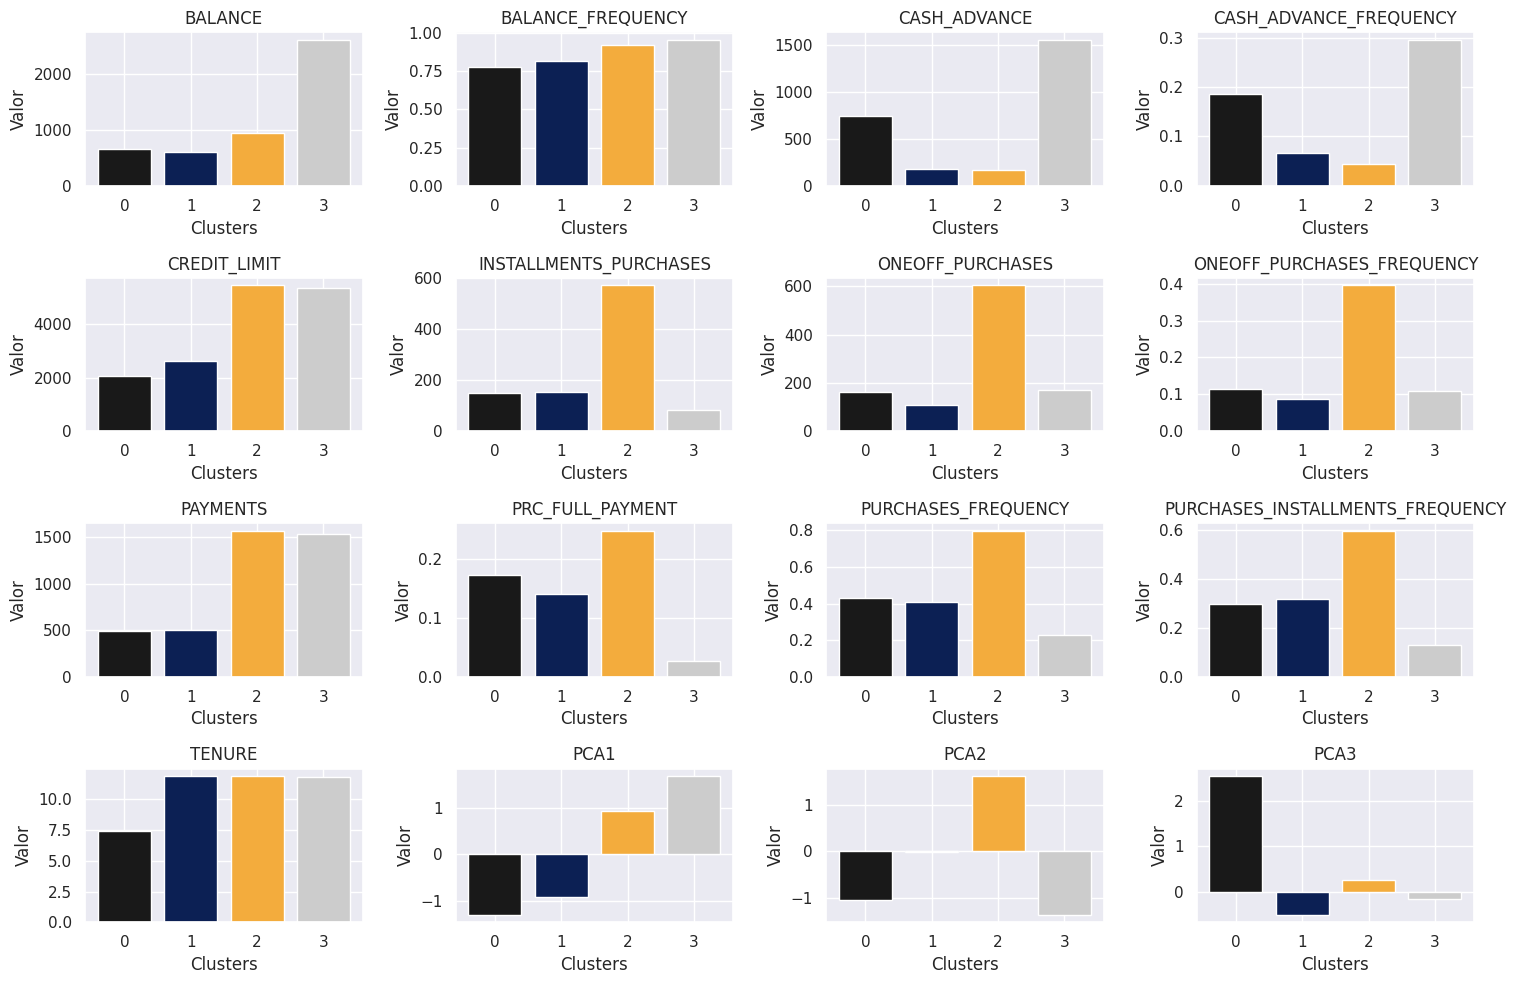

In [ ]:
# Obtener el número de variables
num_variables = len(cluster_means.columns)

# Configurar el tamaño de la figura
plt.figure(figsize=(15, 10))

# Iterar sobre cada variable y crear un gráfico para cada una
for i, variable in enumerate(cluster_means.columns):
    # Crear un nuevo subplot para cada variable
    plt.subplot(4, 4, i + 1)

    # Obtener los valores de la variable para cada cluster
    values = cluster_means[variable]

    # Obtener los índices de los clusters
    clusters = values.index

    # Obtener los valores de la variable para cada cluster
    values = values.values

    # Crear un gráfico de barras para la variable
    plt.bar(clusters, values, color=['#191919', '#0C2054', '#F3AC3D', '#CCCCCC'])

    # Agregar etiquetas y título
    plt.xlabel('Clusters')
    plt.ylabel('Valor')
    plt.title(f'{variable}')

    # Ajustar el espacio entre los gráficos
    plt.tight_layout()

# Mostrar los gráficos
plt.show()


**Clúster 0: Clientes Conservadores**
Los clientes en este clúster tienen un comportamiento financiero conservador pero moderado. Mantienen un saldo restante en su cuenta para hacer compras y actualizan su saldo con una frecuencia moderada. Aunque tienen acceso a efectivo anticipado y un límite de crédito promedio, tienden a realizar compras de forma poco frecuente y prefieren no pagar anticipadamente el efectivo. Sus compras suelen ser de bajo a moderado valor, tanto en cuotas como en compras únicas. Además, muestran un porcentaje de pago completo y una duración de servicio moderados.

**Clúster 1: Clientes Estándar**
Este clúster está compuesto por clientes que actualizan frecuentemente su saldo y mantienen un saldo restante bajo en su cuenta para hacer compras. A pesar de tener acceso a efectivo anticipado y un límite de crédito promedio, tienden a realizar compras de bajo valor y no muestran un patrón de compra frecuente. Sin embargo, muestran un comportamiento de pago moderado y una duración de servicio alta, lo que indica una relación estable con la institución financiera.

**Clúster 2: Clientes Premium**
Los clientes en este clúster son aquellos que realizan compras frecuentes y de alto valor. Mantienen un saldo restante alto en su cuenta y actualizan su saldo con frecuencia. Aunque tienen acceso a efectivo anticipado y un límite de crédito alto, prefieren realizar compras únicas y en cuotas de alto valor. Además, muestran un porcentaje de pago completo y una duración de servicio alta, lo que sugiere una relación sólida y rentable para la institución financiera.

**Clúster 3: Clientes de  Alta liquidez**
Este clúster está conformado por clientes que utilizan frecuentemente el efectivo anticipado y mantienen un saldo restante muy alto en su cuenta. Aunque tienen un límite de crédito alto, muestran un comportamiento de pago moderado y tienden a realizar compras de alto valor, tanto en compras únicas como en cuotas. Sin embargo, su frecuencia de compra es baja, lo que indica una preferencia por el efectivo anticipado en lugar de compras frecuentes. Su duración de servicio es alta, lo que sugiere una relación estable con la institución financiera.
